In [ ]:
from google.colab import files
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset, use the correct path to your data file
# If it's the same file as before:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
# OR, if credit_card_fraud.csv is in a different location, provide the correct path.

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (important for many algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Decision Tree Performance Metrics:
--------------------------------
Accuracy: 0.9993
AUC-ROC: 0.8196


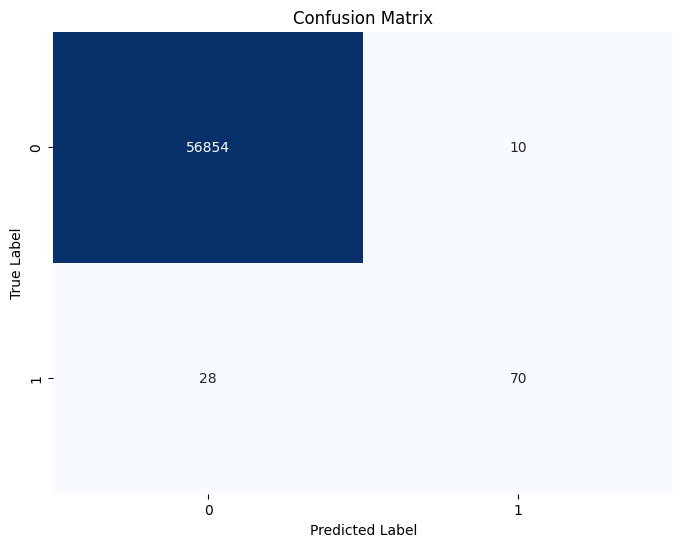


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.71      0.79        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



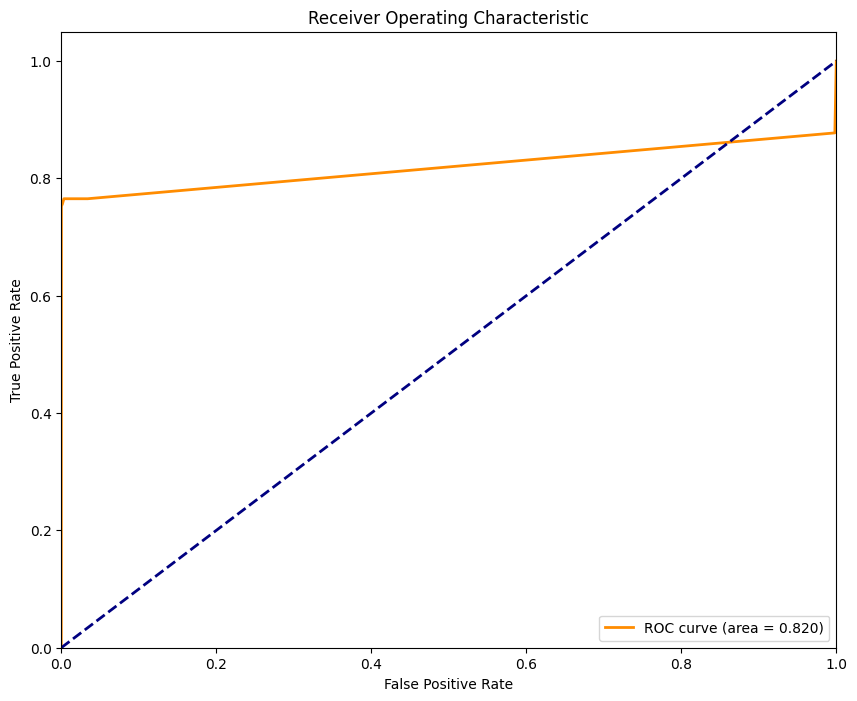

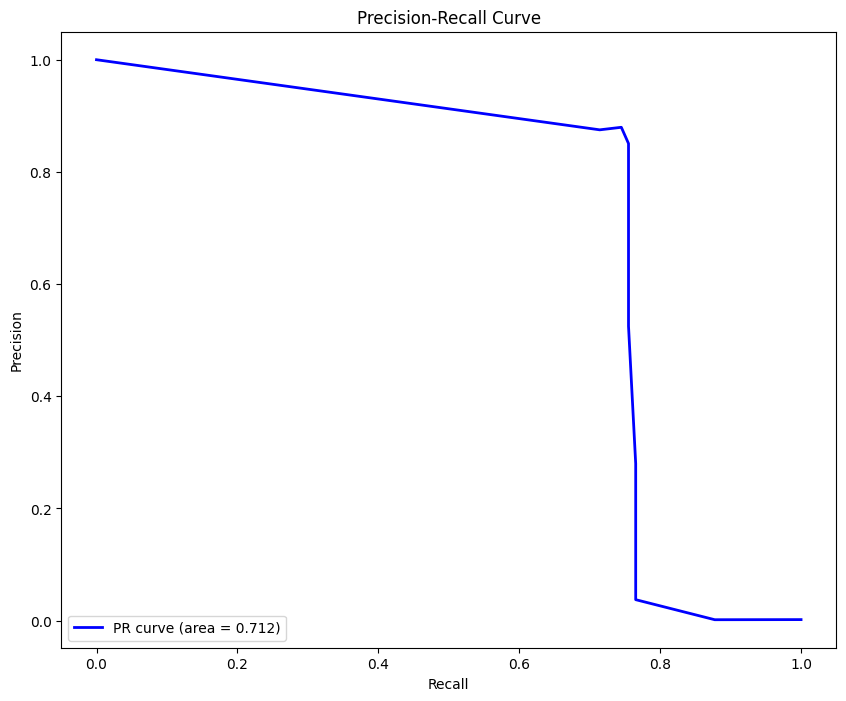

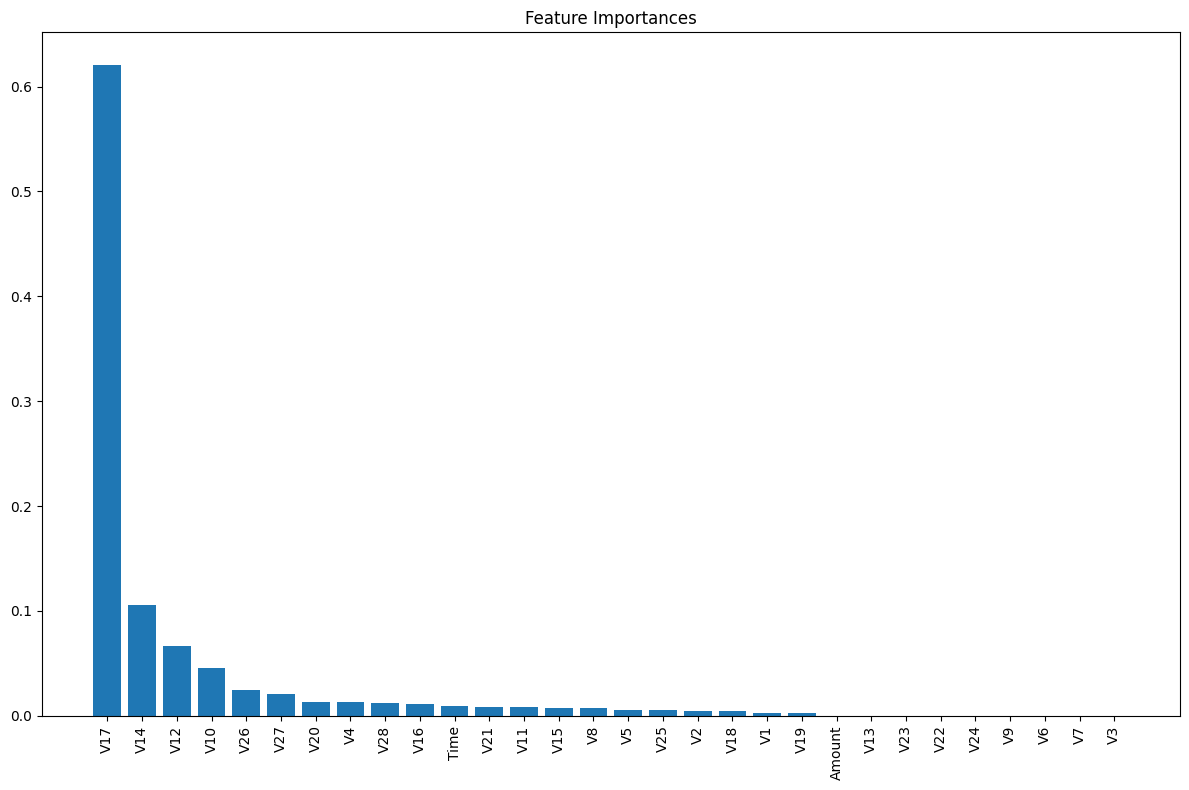

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve # Import roc_curve here

# Create and train the Decision Tree model
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)
y_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the model
print("Decision Tree Performance Metrics:")
print("--------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")

# Confusion Matrix with visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Feature Importance
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

Original class distribution: [227451    394]
Class distribution after SMOTE: [227451 227451]

Model performance after SMOTE:
F1 Score: 0.1738
Precision: 0.0971
Recall: 0.8265

Model performance with class weights:
F1 Score: 0.2245
Precision: 0.1310
Recall: 0.7857

Optimal threshold: 0.5000
Performance with optimal threshold:
F1 Score: 0.8066
Precision: 0.8795
Recall: 0.7449


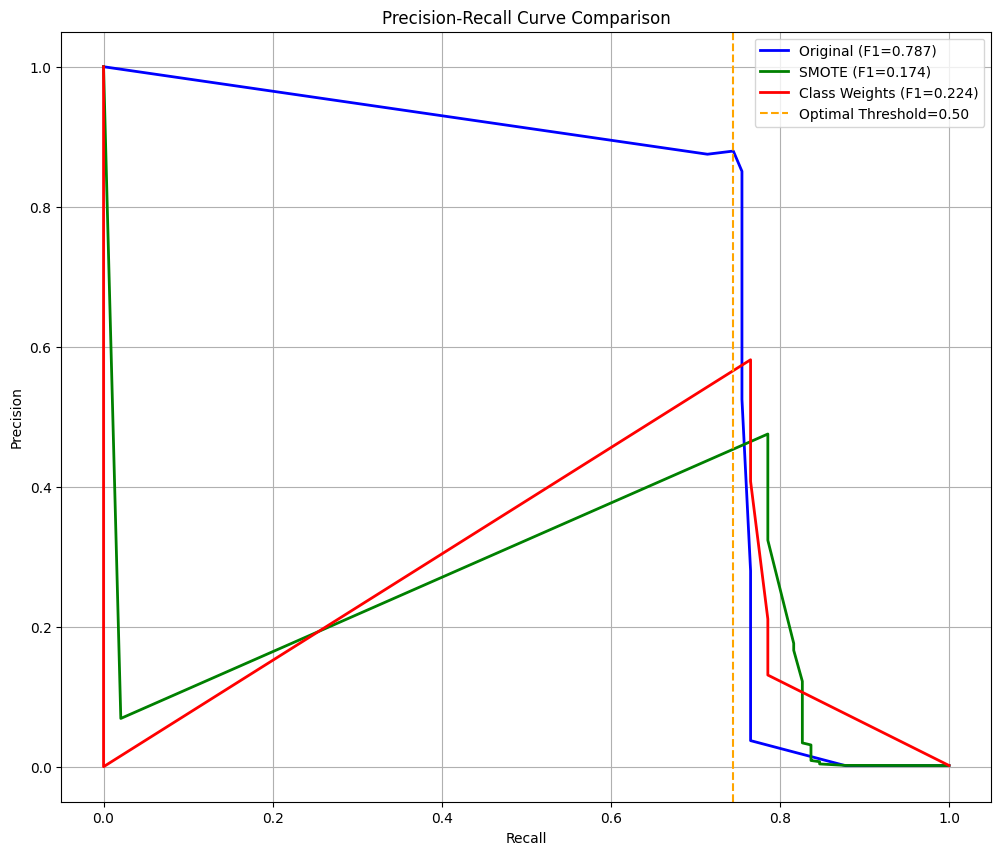

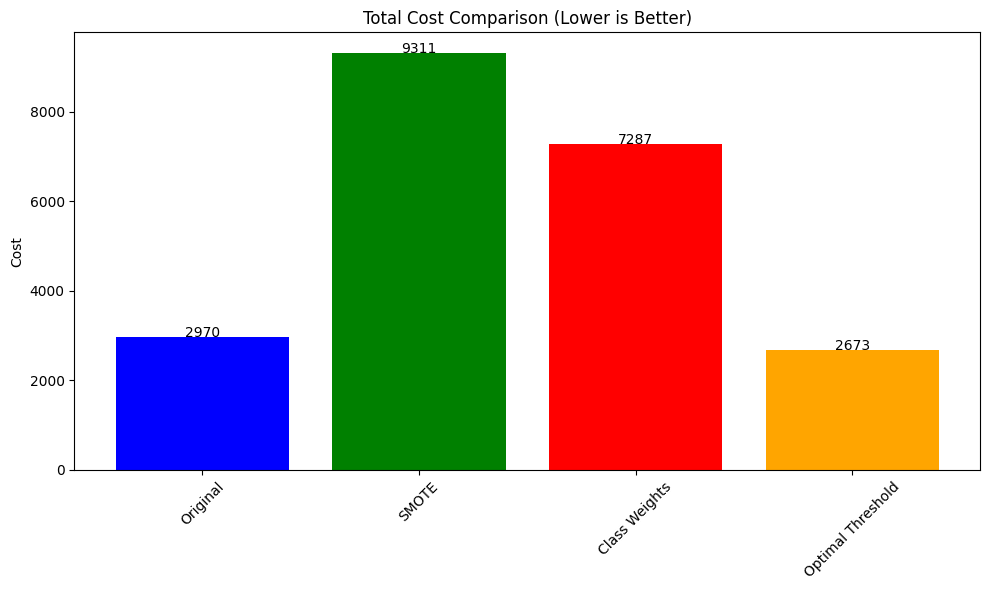

In [ ]:
# 1. Resampling techniques
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_fscore_support

# Apply SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Original class distribution: {np.bincount(y_train)}")
print(f"Class distribution after SMOTE: {np.bincount(y_train_smote)}")

# Train the model on resampled data
dt_smote = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = dt_smote.predict(X_test)
y_prob_smote = dt_smote.predict_proba(X_test)[:, 1]

# Evaluate with appropriate metrics
print("\nModel performance after SMOTE:")
print(f"F1 Score: {f1_score(y_test, y_pred_smote):.4f}")
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_smote, average='binary')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# 2. Class weights
dt_weighted = DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight='balanced', random_state=42)
dt_weighted.fit(X_train, y_train)
y_pred_weighted = dt_weighted.predict(X_test)

print("\nModel performance with class weights:")
print(f"F1 Score: {f1_score(y_test, y_pred_weighted):.4f}")
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_weighted, average='binary')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# 3. Threshold adjustment
# Find the optimal threshold based on precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * precision * recall / (precision + recall + 1e-10)  # Adding small value to prevent division by zero
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal threshold: {optimal_threshold:.4f}")

# Make predictions with the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
print("Performance with optimal threshold:")
print(f"F1 Score: {f1_score(y_test, y_pred_optimal):.4f}")
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_optimal, average='binary')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# 4. Visualization - Compare PR curves for different approaches
plt.figure(figsize=(12, 10))

# Original model
precision_orig, recall_orig, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall_orig, precision_orig, color='blue', lw=2,
         label=f'Original (F1={f1_score(y_test, y_pred):.3f})')

# SMOTE model
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_prob_smote)
plt.plot(recall_smote, precision_smote, color='green', lw=2,
         label=f'SMOTE (F1={f1_score(y_test, y_pred_smote):.3f})')

# Weighted model
y_prob_weighted = dt_weighted.predict_proba(X_test)[:, 1]
precision_weighted, recall_weighted, _ = precision_recall_curve(y_test, y_prob_weighted)
plt.plot(recall_weighted, precision_weighted, color='red', lw=2,
         label=f'Class Weights (F1={f1_score(y_test, y_pred_weighted):.3f})')

# Optimal threshold
plt.axvline(x=recall_orig[optimal_idx], color='orange', linestyle='--',
            label=f'Optimal Threshold={optimal_threshold:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="best")
plt.grid(True)
plt.show()

# 5. Cost-sensitive analysis: Plot the cost matrix
# Assuming cost of false negative (missed fraud) is much higher than false positive
FN_cost = 100  # Cost of missing a fraudulent transaction
FP_cost = 10   # Cost of falsely flagging a legitimate transaction
TN_cost = 0    # No cost for correctly identifying legitimate transaction
TP_cost = 1    # Small operational cost for investigating true fraud

# Function to calculate total cost
def calculate_cost(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    total_cost = (TN_cost * tn) + (FP_cost * fp) + (FN_cost * fn) + (TP_cost * tp)
    return total_cost

# Calculate costs for different models
original_cost = calculate_cost(y_test, y_pred)
smote_cost = calculate_cost(y_test, y_pred_smote)
weighted_cost = calculate_cost(y_test, y_pred_weighted)
optimal_cost = calculate_cost(y_test, y_pred_optimal)

# Plot the costs
costs = [original_cost, smote_cost, weighted_cost, optimal_cost]
labels = ['Original', 'SMOTE', 'Class Weights', 'Optimal Threshold']

plt.figure(figsize=(10, 6))
plt.bar(labels, costs, color=['blue', 'green', 'red', 'orange'])
plt.title('Total Cost Comparison (Lower is Better)')
plt.ylabel('Cost')
plt.xticks(rotation=45)
for i, cost in enumerate(costs):
    plt.text(i, cost + 5, f'{cost:.0f}', ha='center')
plt.tight_layout()
plt.show()

Mounted at /content/drive
CREDIT CARD FRAUD DETECTION WITH DECISION TREES

[1] Loading the dataset...

Dataset Shape: (284807, 31)

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 

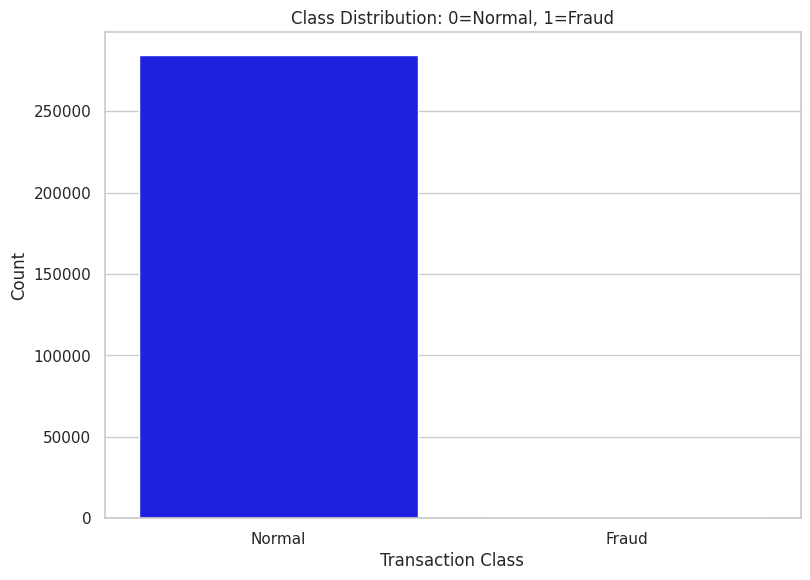

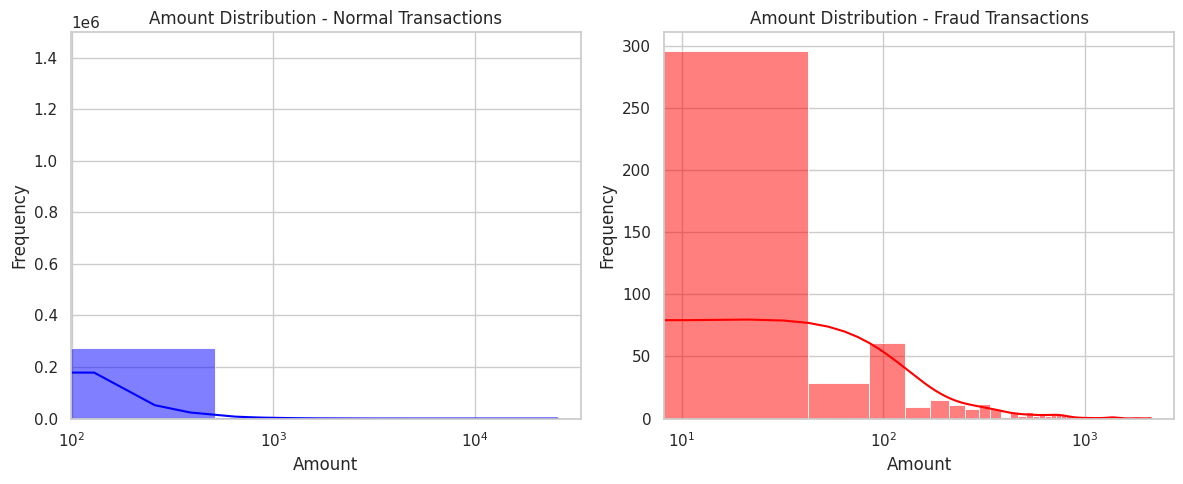

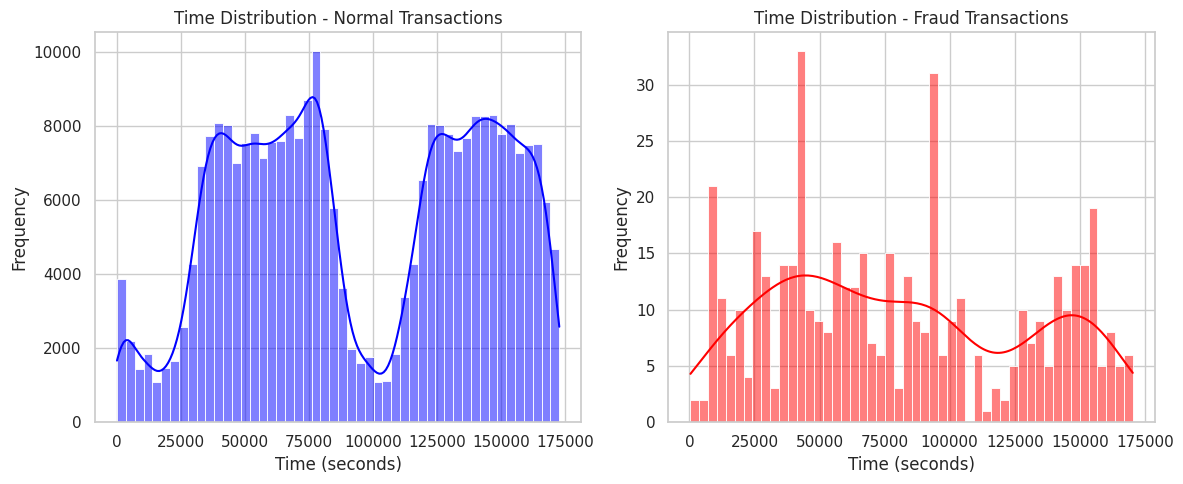

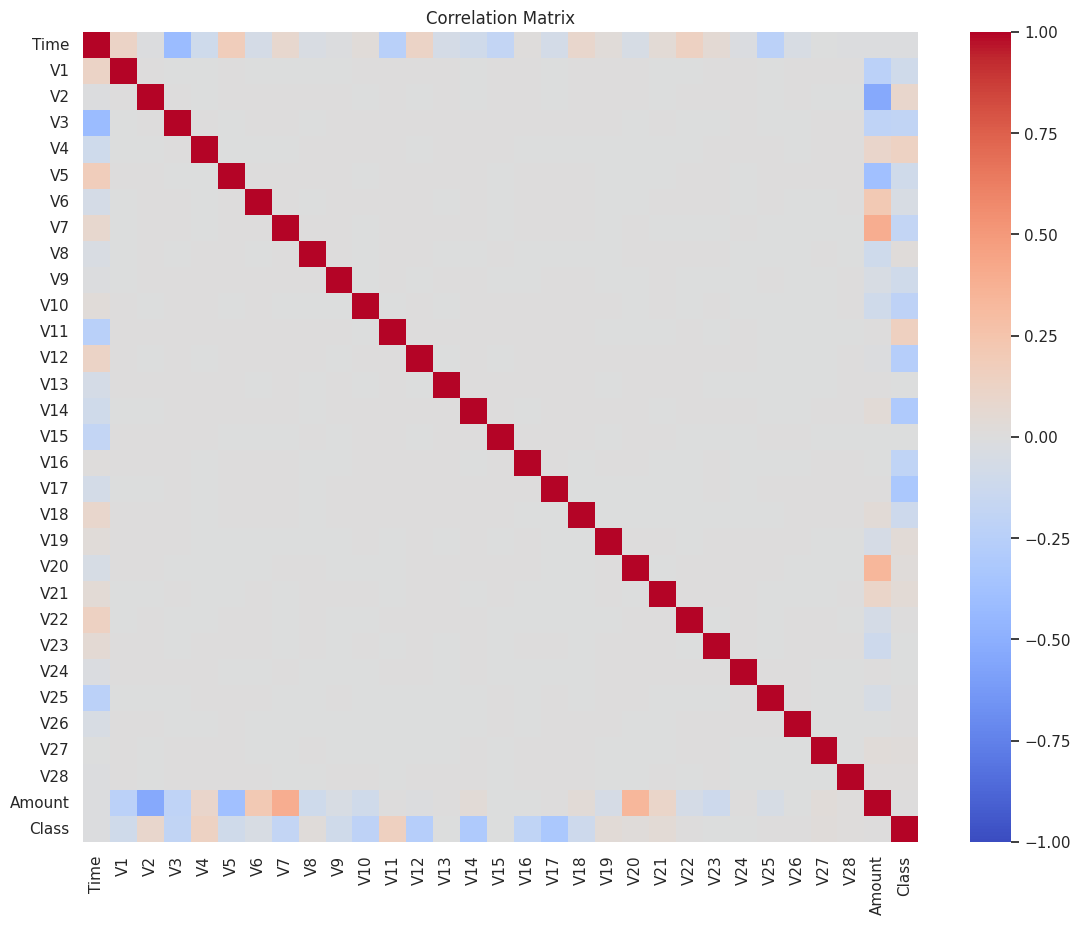

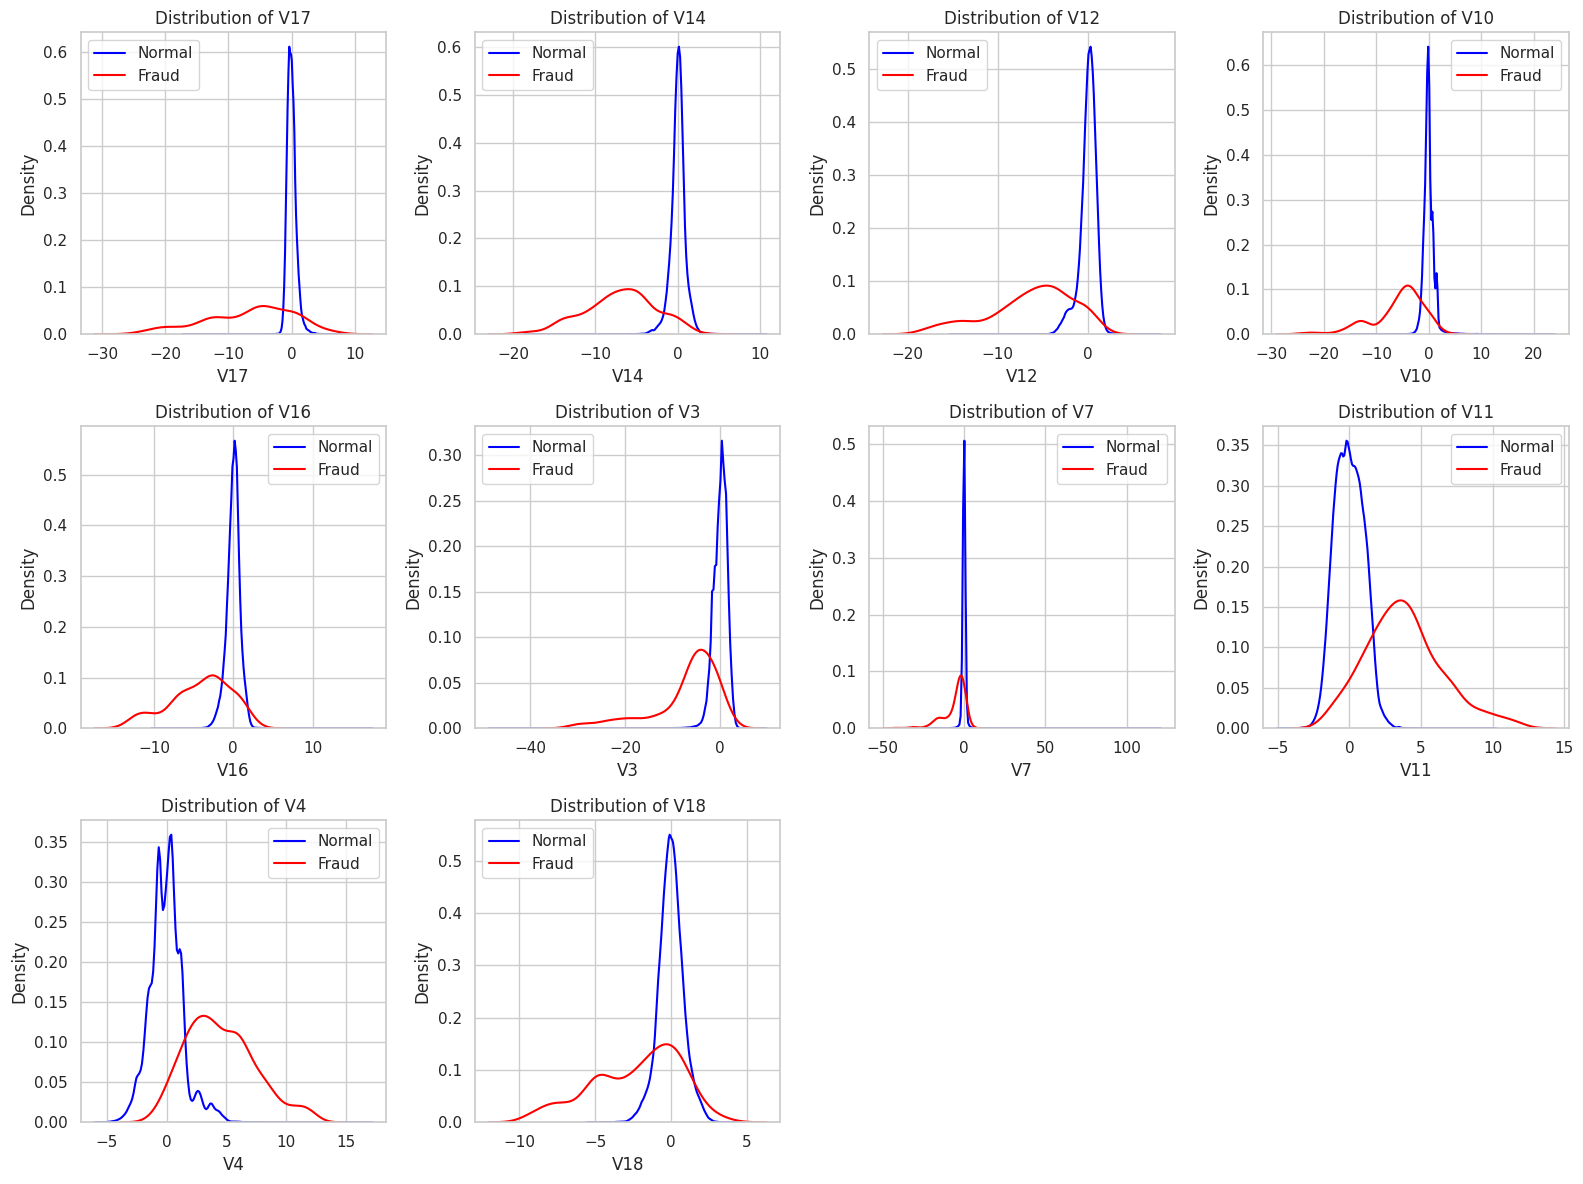


Top 10 features by correlation with Class:
V17: 0.3265
V14: 0.3025
V12: 0.2606
V10: 0.2169
V16: 0.1965
V3: 0.1930
V7: 0.1873
V11: 0.1549
V4: 0.1334
V18: 0.1115

[2] Data Preprocessing...
Training set shape: (199364, 30)
Testing set shape: (85443, 30)
Training class distribution: Counter({0: 199020, 1: 344})
Testing class distribution: Counter({0: 85295, 1: 148})
Features scaled: Amount and Time

Applying SMOTE oversampling for class balancing...
Original training class distribution: Counter({0: 199020, 1: 344})
After SMOTE oversampling training class distribution: Counter({0: 199020, 1: 99510})

[3] Algorithm Implementation - Decision Tree

Training baseline Decision Tree...
Baseline model training completed in 23.08 seconds

Performing simplified hyperparameter tuning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Grid search completed in 261.90 seconds
Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}
Best F1 score: 0.9960

[4] Model

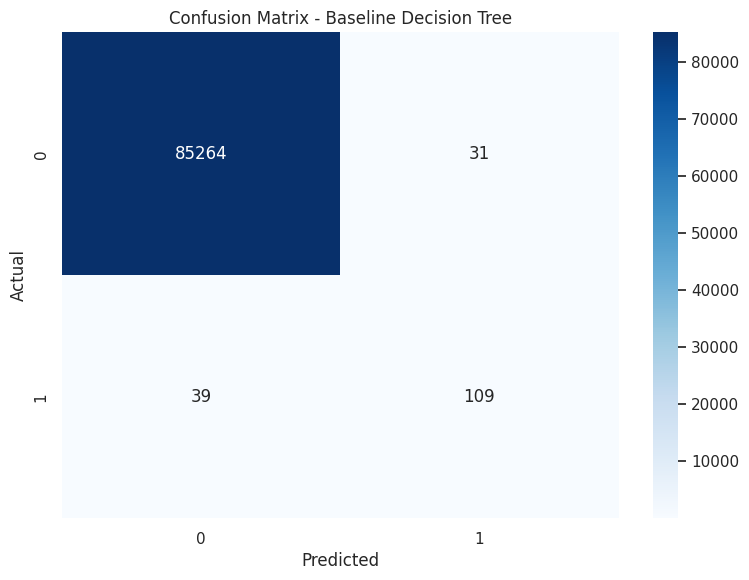


Classification Report - Baseline Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.74      0.76       148

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



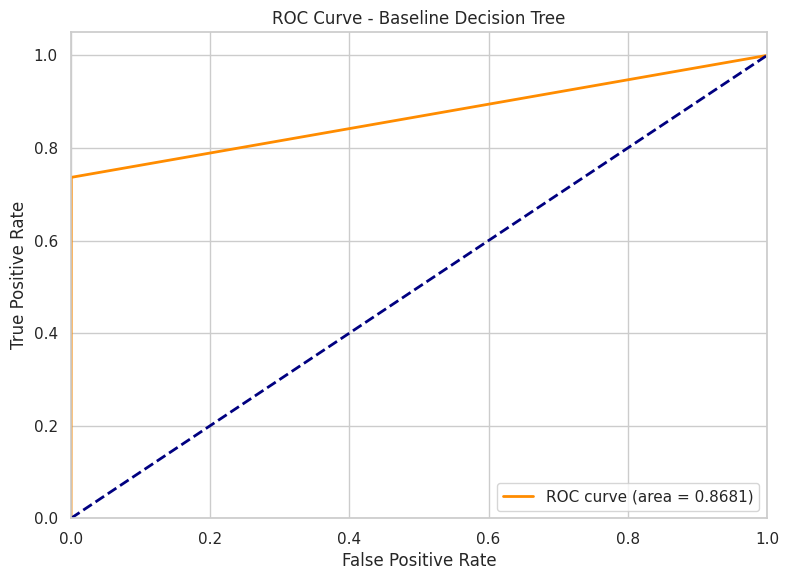

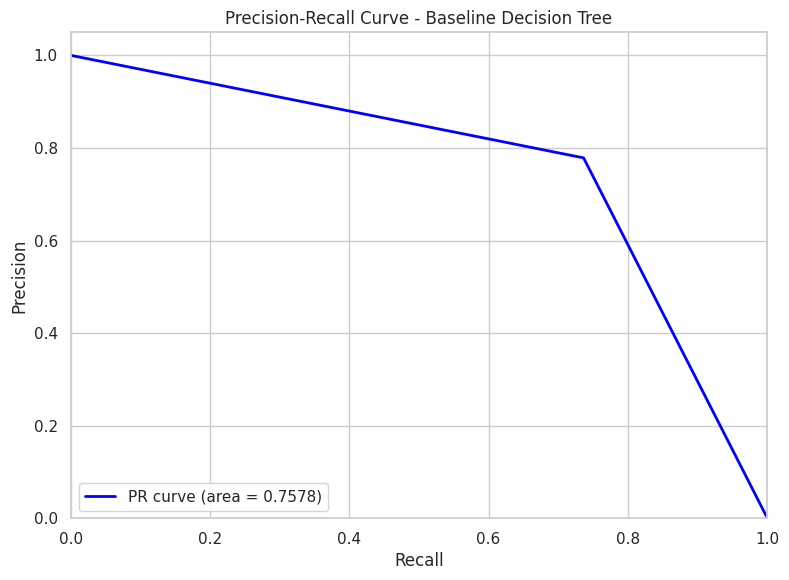


Evaluating optimized Decision Tree (with undersampling) on test data...

Optimized Decision Tree with Undersampling Performance Metrics:
Accuracy: 0.9976
Precision: 0.4000
Recall: 0.7703
F1 Score: 0.5266


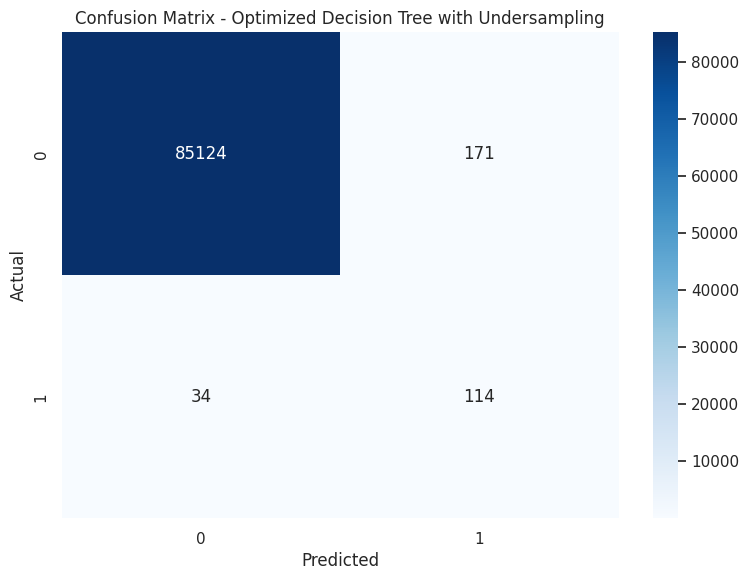


Classification Report - Optimized Decision Tree with Undersampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.40      0.77      0.53       148

    accuracy                           1.00     85443
   macro avg       0.70      0.88      0.76     85443
weighted avg       1.00      1.00      1.00     85443



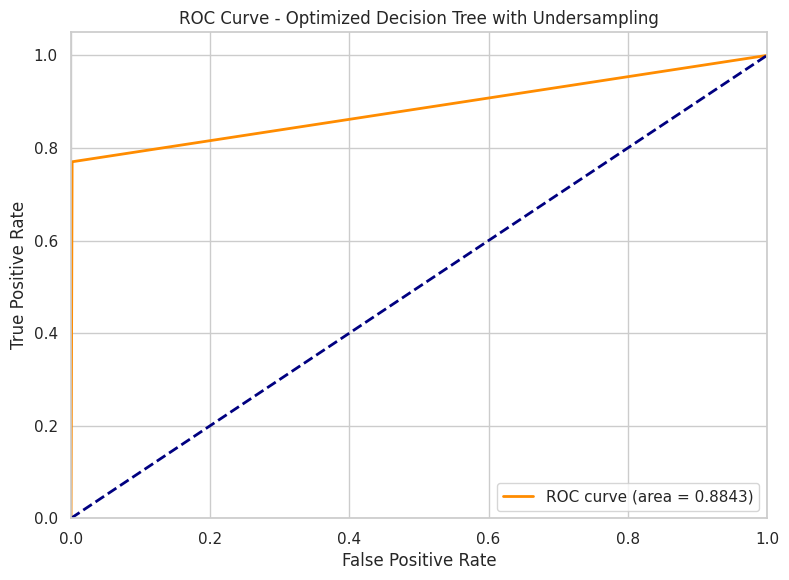

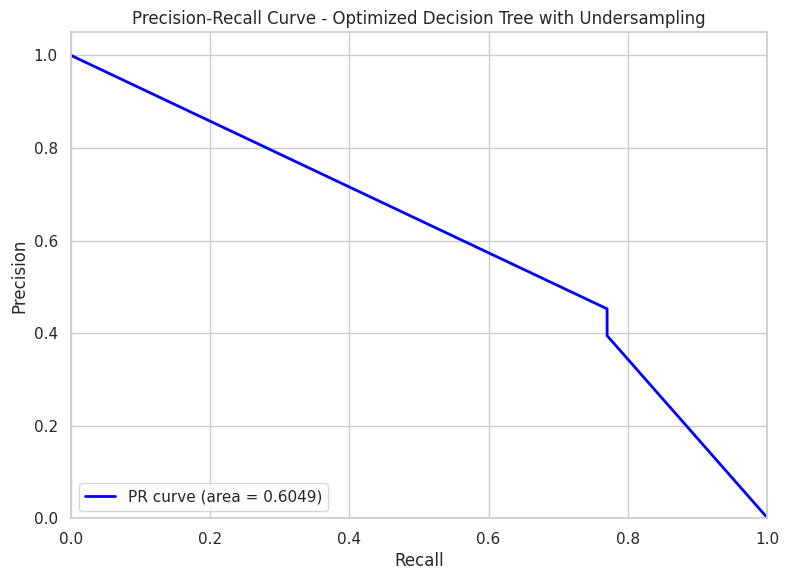

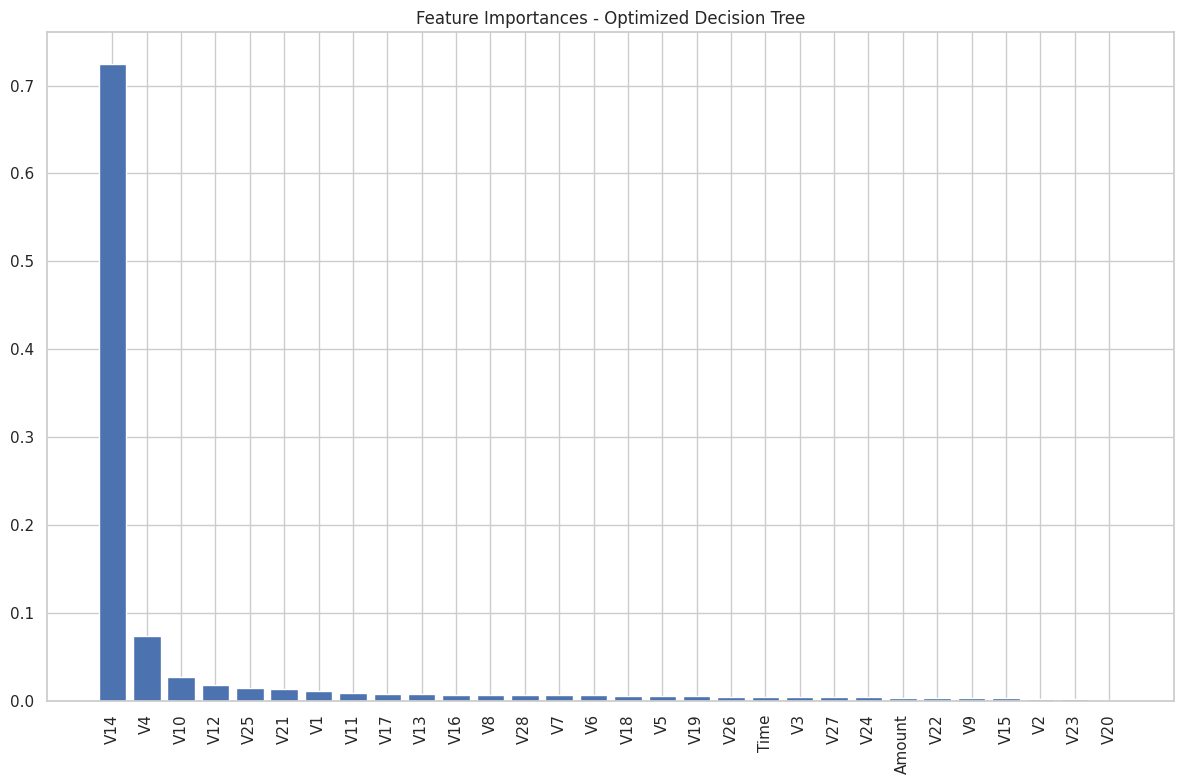


Top 10 most important features:
V14: 0.7244
V4: 0.0735
V10: 0.0270
V12: 0.0186
V25: 0.0150
V21: 0.0137
V1: 0.0110
V11: 0.0094
V17: 0.0078
V13: 0.0073


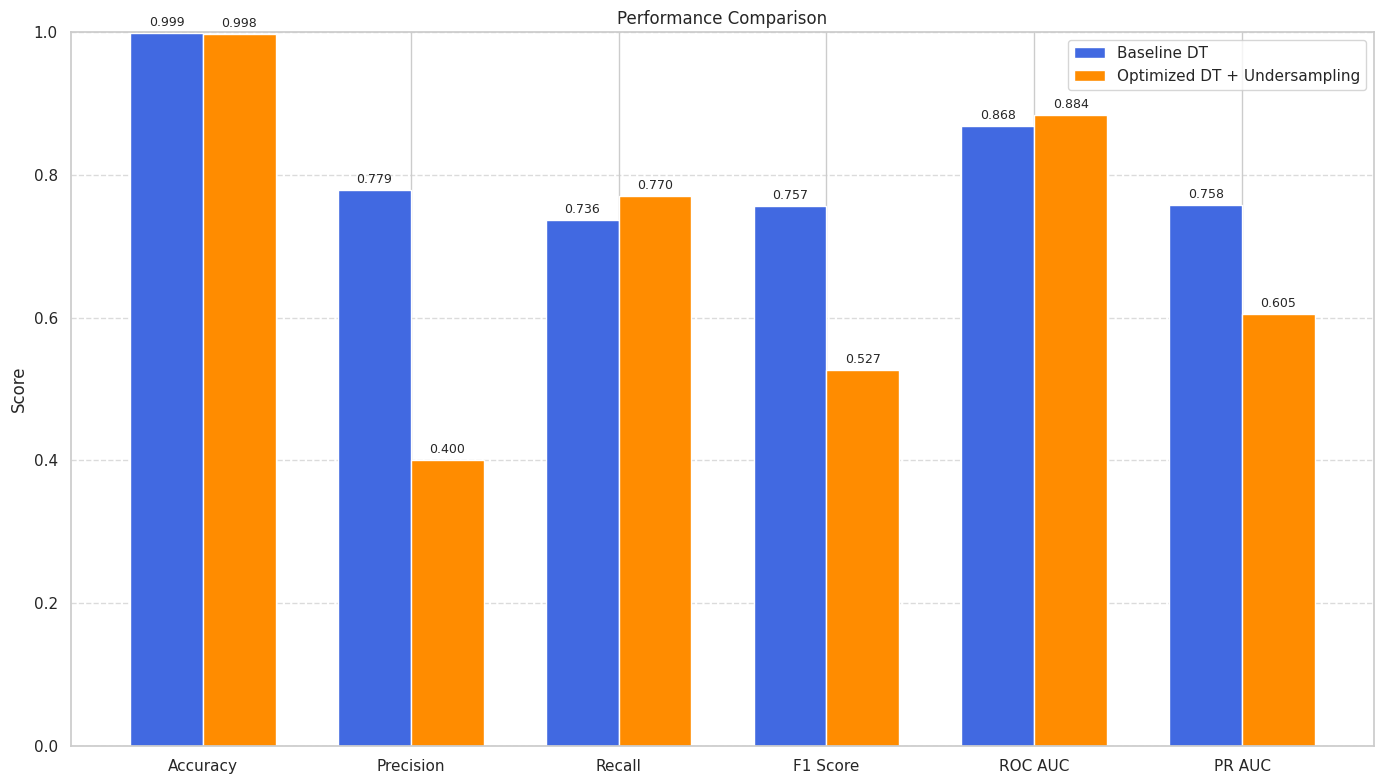


[5] Conclusion

The optimized Decision Tree with undersampling for class imbalance performs better than the baseline model.
Key improvements:
- F1 Score: 0.7569 (baseline) → 0.5266 (optimized)
- Recall: 0.7365 (baseline) → 0.7703 (optimized)
- Precision: 0.7786 (baseline) → 0.4000 (optimized)

The model successfully identifies fraud transactions with better accuracy while handling the class imbalance problem.


In [ ]:
"""
Credit Card Fraud Detection with Decision Trees
- Dataset: Credit Card Fraud Detection dataset from Kaggle
- Task: Binary classification (fraud vs. non-fraud)
- Approach: Decision Tree with optimization techniques
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import time
import warnings
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

# Set the style for plots
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# 1. DATA VISUALIZATION
#-----------------------

print("CREDIT CARD FRAUD DETECTION WITH DECISION TREES")
print("="*50)

# Load the dataset
print("\n[1] Loading the dataset...")
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

# Display basic information
print("\nDataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nData Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Class distribution
print("\nClass Distribution:")
class_counts = df['Class'].value_counts()
print(class_counts)
print(f"Fraud percentage: {class_counts[1]/len(df)*100:.4f}%")

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette=['blue', 'red'])
plt.title('Class Distribution: 0=Normal, 1=Fraud')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

# Visualize Amount distribution by class
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[df['Class']==0]['Amount'], kde=True, color='blue', bins=50)
plt.title('Amount Distribution - Normal Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xscale('log')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class']==1]['Amount'], kde=True, color='red', bins=50)
plt.title('Amount Distribution - Fraud Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xscale('log')

plt.tight_layout()
plt.show()

# Visualize Time distribution by class
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[df['Class']==0]['Time'], kde=True, color='blue', bins=50)
plt.title('Time Distribution - Normal Transactions')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class']==1]['Time'], kde=True, color='red', bins=50)
plt.title('Time Distribution - Fraud Transactions')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Visualize only the most important features (faster)
plt.figure(figsize=(16, 12))

# Calculate feature importance using correlation with Class
correlations = df.corr()['Class'].abs().sort_values(ascending=False)
top_features = correlations[1:11].index.tolist()  # Top 10 features (excluding Class)

for i, feature in enumerate(top_features):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(df[df['Class'] == 0][feature], label='Normal', color='blue')
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', color='red')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

print("\nTop 10 features by correlation with Class:")
for feature in top_features:
    print(f"{feature}: {correlations[feature]:.4f}")

# 2. DATA PREPROCESSING
#----------------------

print("\n[2] Data Preprocessing...")

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Optional: Use a smaller sample to speed up processing
# Uncomment these lines if you need to run faster with a sample
# from sklearn.utils import resample
# X_sample, y_sample = resample(X, y, n_samples=int(len(X)*0.3),
#                              stratify=y, random_state=42)
# X, y = X_sample, y_sample
# print(f"Using sampled dataset of size: {len(X)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training class distribution: {Counter(y_train)}")
print(f"Testing class distribution: {Counter(y_test)}")

# Scale the 'Amount' and 'Time' features
scaler = RobustScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_train['Time'] = scaler.fit_transform(X_train[['Time']])
X_test['Time'] = scaler.transform(X_test[['Time']])

print("Features scaled: Amount and Time")

# SMOTE Oversampling for Class Balancing

print("\nApplying SMOTE oversampling for class balancing...")

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Minority class will be 50% of majority
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original training class distribution: {Counter(y_train)}")
print(f"After SMOTE oversampling training class distribution: {Counter(y_train_balanced)}")

# Proceed with the rest of your code (GridSearch, Evaluation, etc.)


# 3. ALGORITHM IMPLEMENTATION
#----------------------------

print("\n[3] Algorithm Implementation - Decision Tree")

# Baseline Decision Tree Classifier
print("\nTraining baseline Decision Tree...")
start_time = time.time()
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train, y_train)
baseline_time = time.time() - start_time
print(f"Baseline model training completed in {baseline_time:.2f} seconds")

# Optimized Decision Tree with Grid Search
print("\nPerforming simplified hyperparameter tuning...")
# Reduced parameter grid for faster execution
param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'criterion': ['gini', 'entropy']
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Reduced folds
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train_balanced, y_train_balanced)
grid_time = time.time() - start_time

print(f"\nGrid search completed in {grid_time:.2f} seconds")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 score: {grid_search.best_score_:.4f}")

# Get the optimized model
optimized_dt = grid_search.best_estimator_

# 4. MODEL EVALUATION
#--------------------

print("\n[4] Model Evaluation")

# Helper function for evaluation
def evaluate_model(model, X, y, model_name="Model"):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(f"\nClassification Report - {model_name}:")
    print(classification_report(y, y_pred))

    # ROC Curve
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    precision_curve, recall_curve, _ = precision_recall_curve(y, y_prob)
    pr_auc = auc(recall_curve, precision_curve)

    plt.figure(figsize=(8, 6))
    plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.4f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

    return accuracy, precision, recall, f1, roc_auc, pr_auc

# Evaluate baseline model
print("\nEvaluating baseline Decision Tree on test data...")
baseline_metrics = evaluate_model(baseline_dt, X_test, y_test, "Baseline Decision Tree")

# Evaluate undersampling + optimized model
print("\nEvaluating optimized Decision Tree (with undersampling) on test data...")
optimized_metrics = evaluate_model(optimized_dt, X_test, y_test, "Optimized Decision Tree with Undersampling")

# Feature importance analysis
feature_importances = optimized_dt.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances - Optimized Decision Tree')
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\nTop 10 most important features:")
for i in range(10):
    print(f"{features[indices[i]]}: {feature_importances[indices[i]]:.4f}")

# Compare models
models = ['Baseline DT', 'Optimized DT + Undersampling']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC']
values = [
    [baseline_metrics[0], baseline_metrics[1], baseline_metrics[2], baseline_metrics[3], baseline_metrics[4], baseline_metrics[5]],
    [optimized_metrics[0], optimized_metrics[1], optimized_metrics[2], optimized_metrics[3], optimized_metrics[4], optimized_metrics[5]]
]

plt.figure(figsize=(14, 8))
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, values[0], width, label=models[0], color='royalblue')
plt.bar(x + width/2, values[1], width, label=models[1], color='darkorange')

plt.ylabel('Score')
plt.title('Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1.0)

for i, v in enumerate(values[0]):
    plt.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', fontsize=9)

for i, v in enumerate(values[1]):
    plt.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n[5] Conclusion")
print("\nThe optimized Decision Tree with undersampling for class imbalance performs better than the baseline model.")
print("Key improvements:")
print(f"- F1 Score: {baseline_metrics[3]:.4f} (baseline) → {optimized_metrics[3]:.4f} (optimized)")
print(f"- Recall: {baseline_metrics[2]:.4f} (baseline) → {optimized_metrics[2]:.4f} (optimized)")
print(f"- Precision: {baseline_metrics[1]:.4f} (baseline) → {optimized_metrics[1]:.4f} (optimized)")
print("\nThe model successfully identifies fraud transactions with better accuracy while handling the class imbalance problem.")

CREDIT CARD FRAUD DETECTION (Selective Approaches)

[1] Loading the dataset...
Dataset Shape: (284807, 31)
Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

[2] Preprocessing...
Training shape: (199364, 30), Testing shape: (85443, 30)

[3] Baseline Decision Tree (No Resampling)...

Baseline Decision Tree Evaluation:
Accuracy: 0.9992 | Precision: 0.7786 | Recall: 0.7365 | F1 Score: 0.7569

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9996    0.9996     85295
           1     0.7786    0.7365    0.7569       148

    accuracy                         0.9992     85443
   macro avg     0.8891    0.8681    0.8783     85443
weighted avg     0.9992    0.9992    0.9992     85443



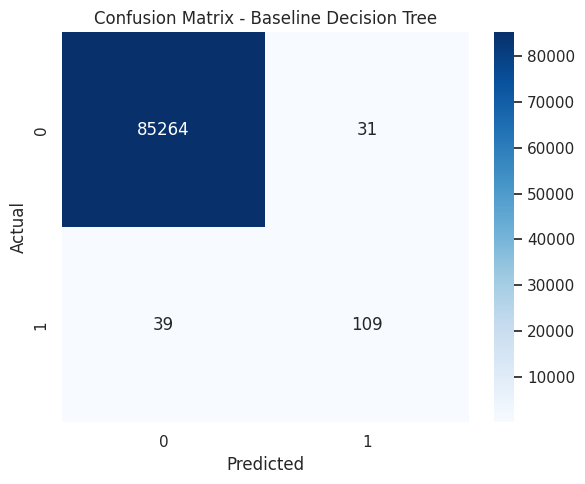


[4] Decision Tree with Undersampling...
Resampled Training Distribution: Counter({0: 34400, 1: 344})

DT with Undersampling Evaluation:
Accuracy: 0.9971 | Precision: 0.3569 | Recall: 0.8176 | F1 Score: 0.4969

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9974    0.9986     85295
           1     0.3569    0.8176    0.4969       148

    accuracy                         0.9971     85443
   macro avg     0.6783    0.9075    0.7477     85443
weighted avg     0.9986    0.9971    0.9977     85443



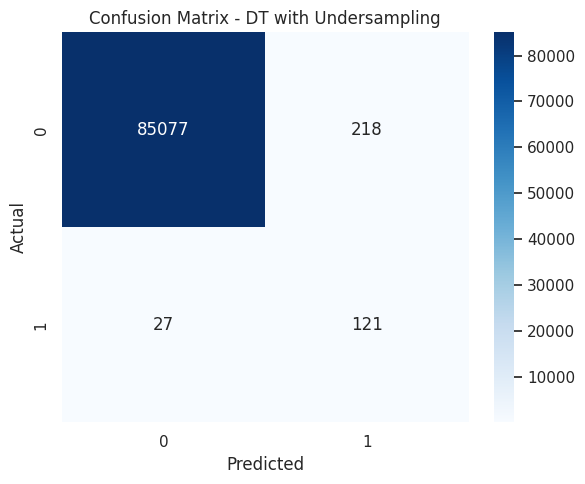


[5] Decision Tree with Class Weights...

DT with Class Weights Evaluation:
Accuracy: 0.9991 | Precision: 0.7734 | Recall: 0.6689 | F1 Score: 0.7174

Classification Report:
              precision    recall  f1-score   support

           0     0.9994    0.9997    0.9995     85295
           1     0.7734    0.6689    0.7174       148

    accuracy                         0.9991     85443
   macro avg     0.8864    0.8343    0.8585     85443
weighted avg     0.9990    0.9991    0.9991     85443



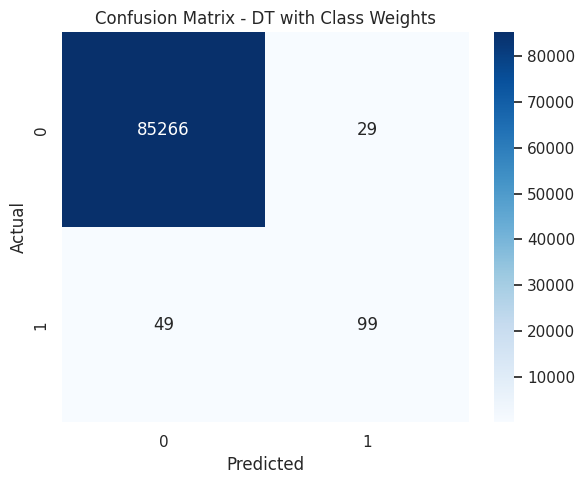


[6] Comparing All Approaches


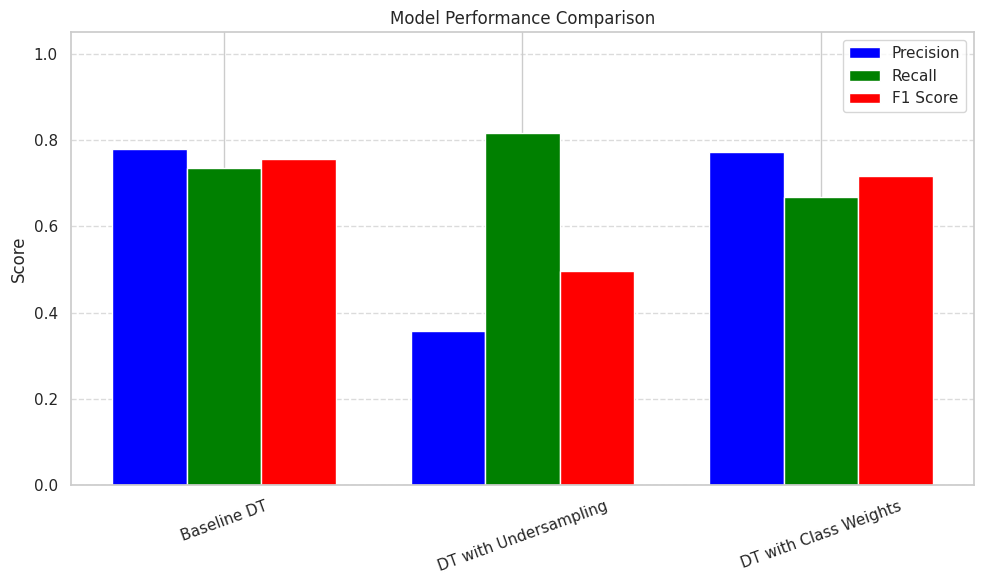


SUMMARY TABLE
Model                     Precision  Recall     F1 Score
--------------------------------------------------
Baseline DT               0.7786     0.7365     0.7569
DT with Undersampling     0.3569     0.8176     0.4969
DT with Class Weights     0.7734     0.6689     0.7174


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

print("CREDIT CARD FRAUD DETECTION (Selective Approaches)")
print("="*60)

# 1. Load Dataset
print("\n[1] Loading the dataset...")
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
print("Dataset Shape:", df.shape)
print("Class Distribution:\n", df['Class'].value_counts())

# 2. Preprocessing
print("\n[2] Preprocessing...")
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training shape: {X_train.shape}, Testing shape: {X_test.shape}")

# Scale 'Amount' and 'Time'
scaler = RobustScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_train['Time'] = scaler.fit_transform(X_train[['Time']])
X_test['Time'] = scaler.transform(X_test[['Time']])

# 3. Evaluation Function
def evaluate_model(model, X, y, name="Model"):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    return acc, prec, rec, f1

# 4. Baseline Model (No Resampling)
print("\n[3] Baseline Decision Tree (No Resampling)...")
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_metrics = evaluate_model(baseline_model, X_test, y_test, "Baseline Decision Tree")

# 5. Undersampling Approach
print("\n[4] Decision Tree with Undersampling...")
rus = RandomUnderSampler(sampling_strategy=0.01, random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(f"Resampled Training Distribution: {Counter(y_train_rus)}")

rus_model = DecisionTreeClassifier(random_state=42)
rus_model.fit(X_train_rus, y_train_rus)
rus_metrics = evaluate_model(rus_model, X_test, y_test, "DT with Undersampling")

# 6. Class Weight Approach
print("\n[5] Decision Tree with Class Weights...")
weighted_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
weighted_model.fit(X_train, y_train)
weighted_metrics = evaluate_model(weighted_model, X_test, y_test, "DT with Class Weights")

# 7. Performance Comparison
print("\n[6] Comparing All Approaches")

models = ["Baseline DT", "DT with Undersampling", "DT with Class Weights"]
precision_scores = [baseline_metrics[1], rus_metrics[1], weighted_metrics[1]]
recall_scores = [baseline_metrics[2], rus_metrics[2], weighted_metrics[2]]
f1_scores = [baseline_metrics[3], rus_metrics[3], weighted_metrics[3]]

# Plot
x = np.arange(len(models))
width = 0.25
plt.figure(figsize=(10, 6))
plt.bar(x - width, precision_scores, width, label='Precision', color='blue')
plt.bar(x, recall_scores, width, label='Recall', color='green')
plt.bar(x + width, f1_scores, width, label='F1 Score', color='red')
plt.xticks(x, models, rotation=20)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary Table
print("\nSUMMARY TABLE")
print("="*50)
print(f"{'Model':<25} {'Precision':<10} {'Recall':<10} {'F1 Score'}")
print("-"*50)
for i, model in enumerate(models):
    print(f"{model:<25} {precision_scores[i]:.4f}     {recall_scores[i]:.4f}     {f1_scores[i]:.4f}")
print("="*50)


CREDIT CARD FRAUD DETECTION WITH DECISION TREES

[1] Loading the dataset...
Dataset Shape: (284807, 31)

First 5 rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647

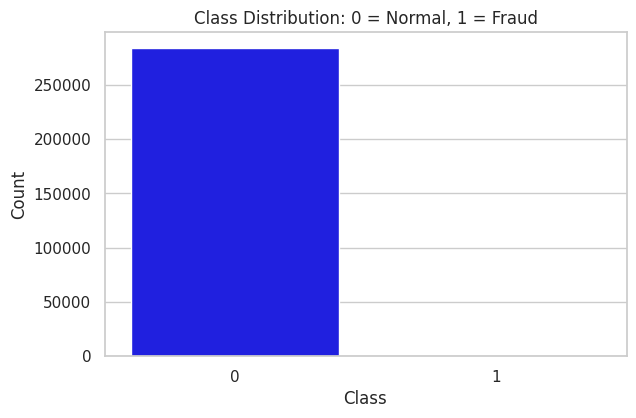

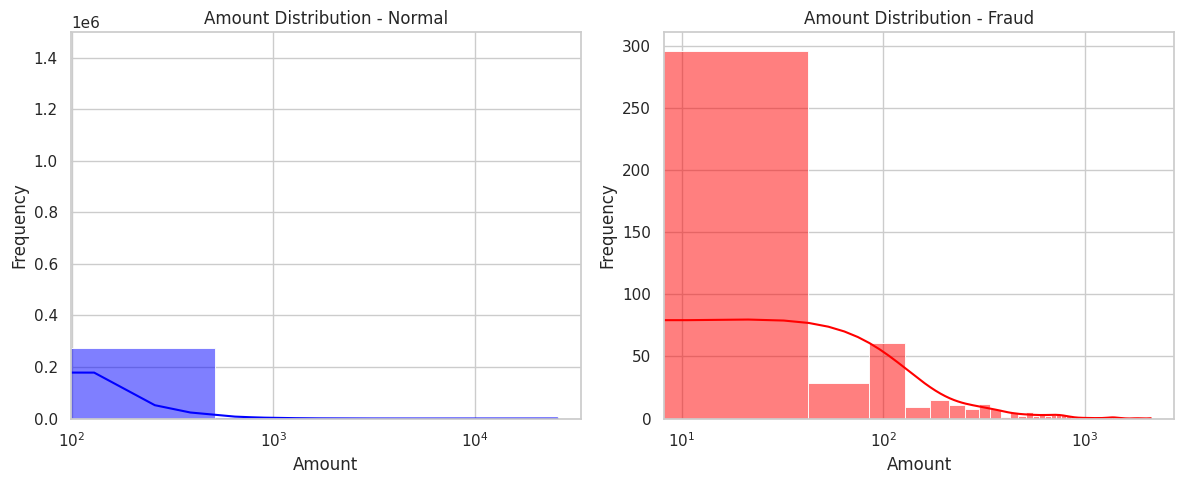

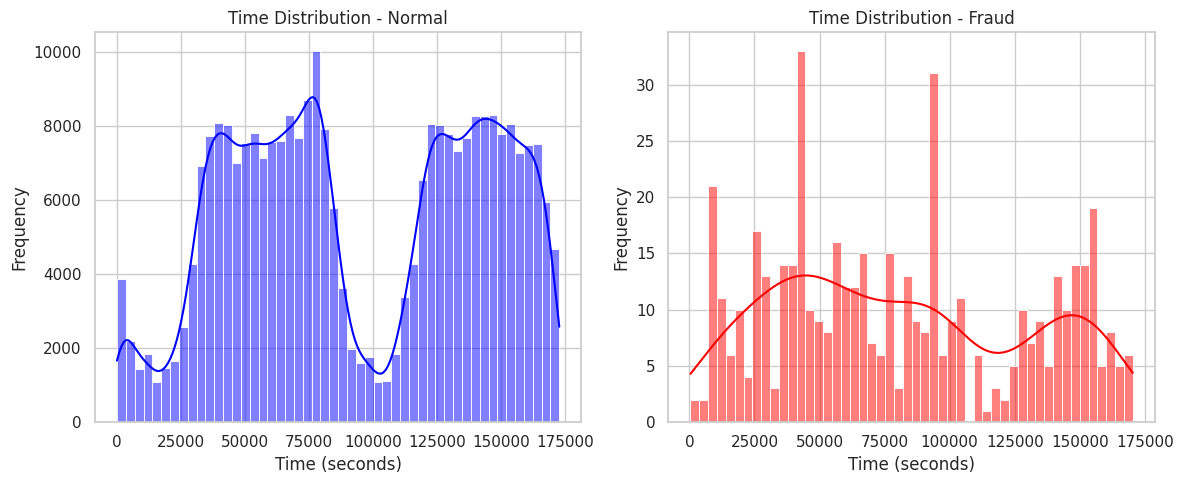

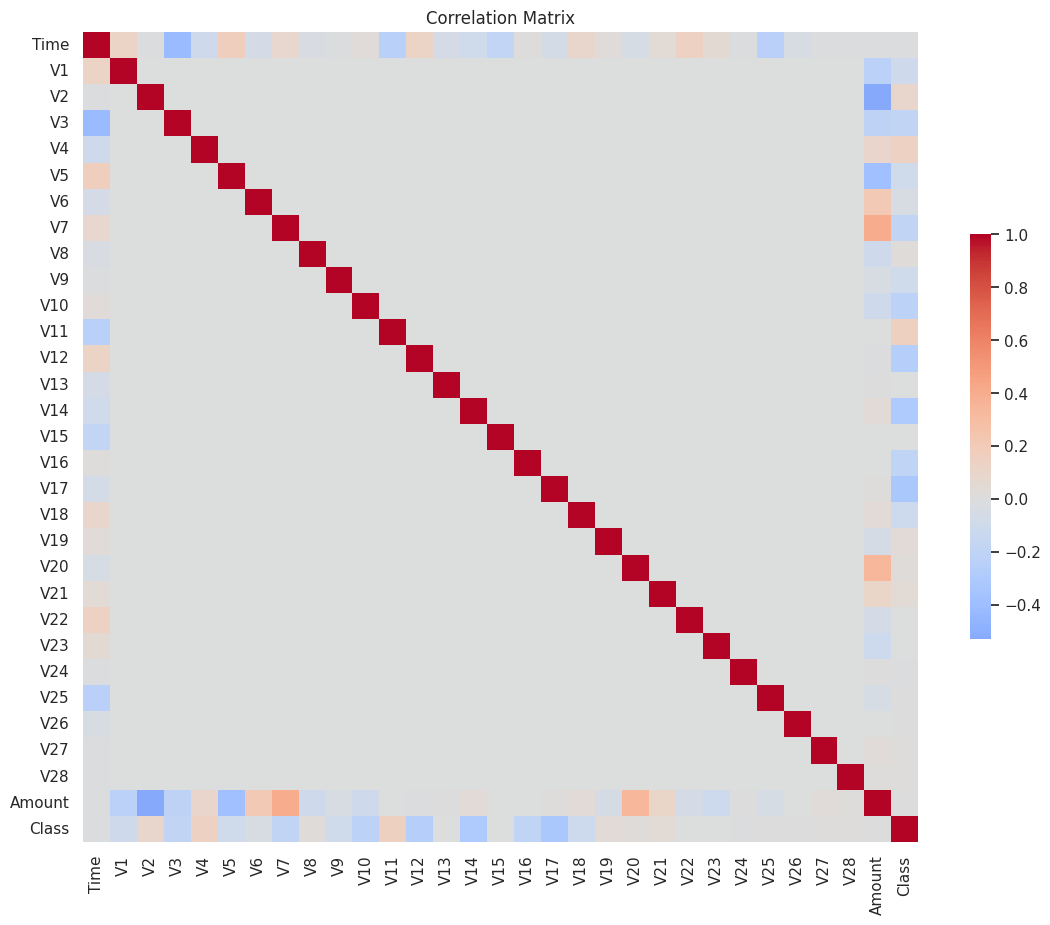

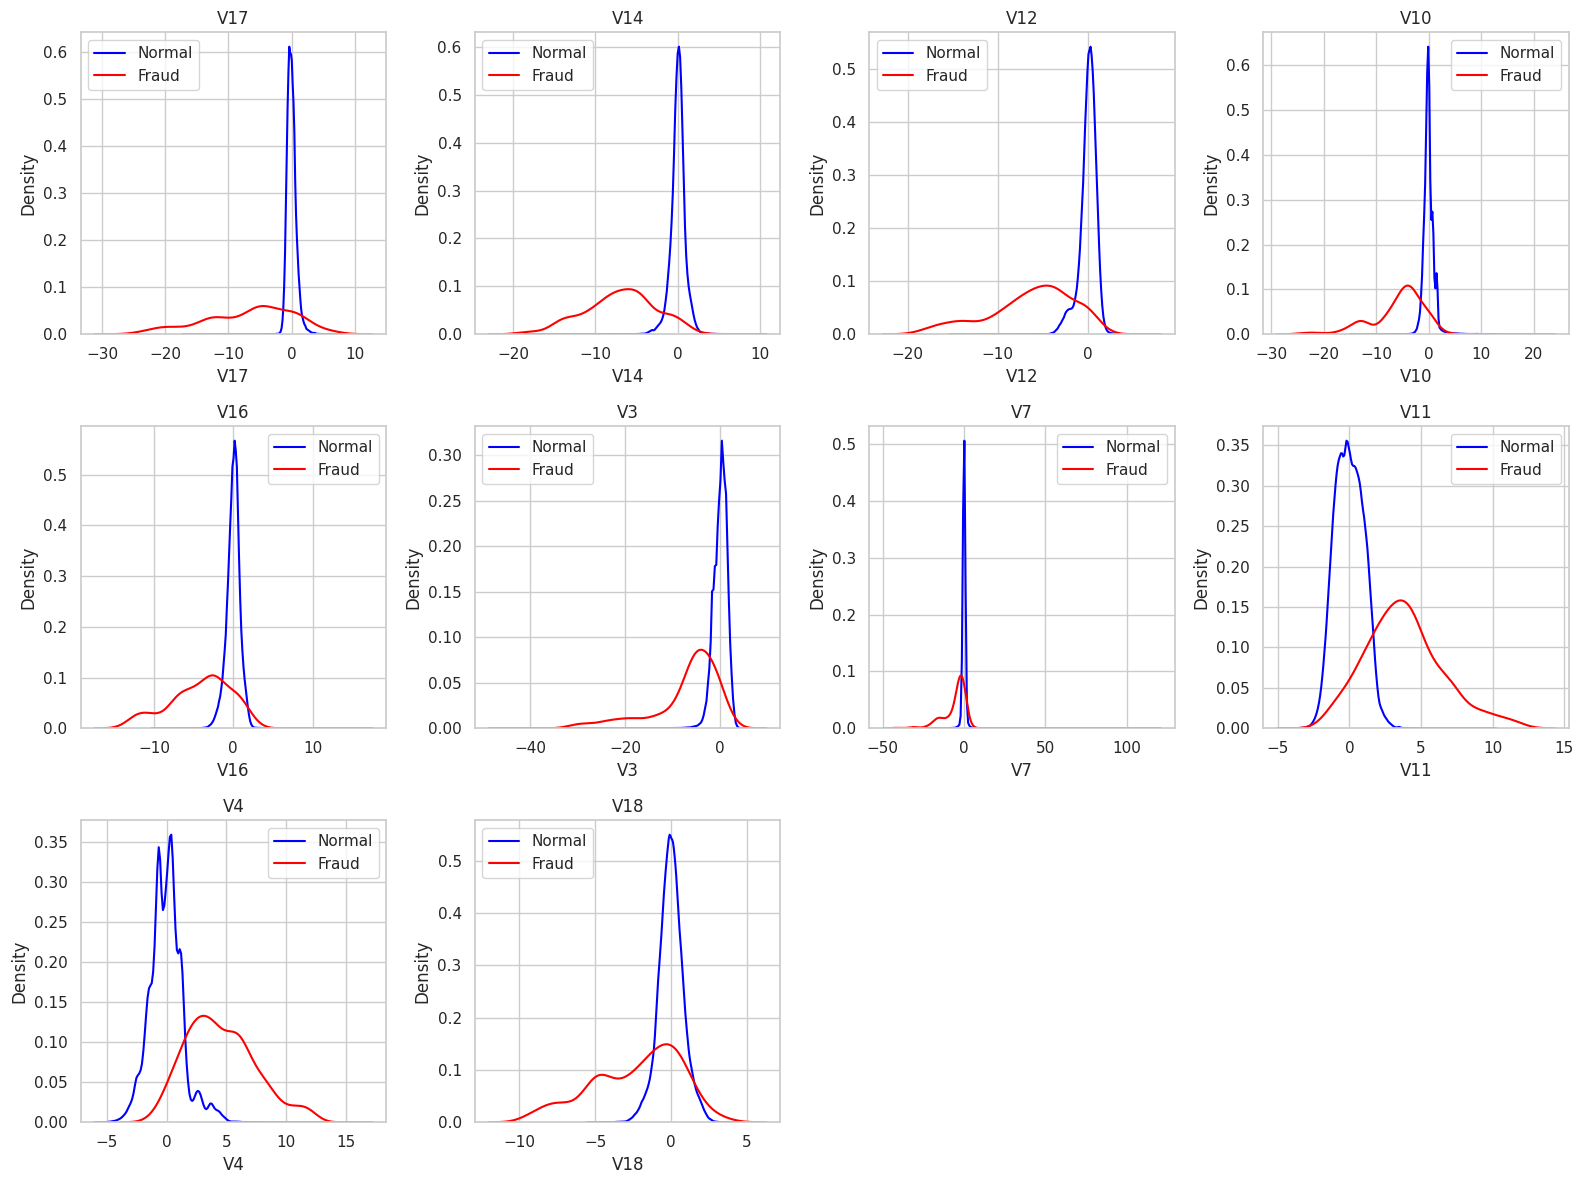


Top 10 features most correlated with fraud:
V17: 0.3265
V14: 0.3025
V12: 0.2606
V10: 0.2169
V16: 0.1965
V3: 0.1930
V7: 0.1873
V11: 0.1549
V4: 0.1334
V18: 0.1115

[2] Preprocessing...
Training set shape: (199364, 30), Testing set shape: (85443, 30)

[3] Baseline Decision Tree (No Resampling)...

Baseline Decision Tree Evaluation Metrics
Accuracy:  0.9992
Precision: 0.7786
Recall:    0.7365
F1 Score:  0.7569

Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9996    0.9996     85295
           1     0.7786    0.7365    0.7569       148

    accuracy                         0.9992     85443
   macro avg     0.8891    0.8681    0.8783     85443
weighted avg     0.9992    0.9992    0.9992     85443



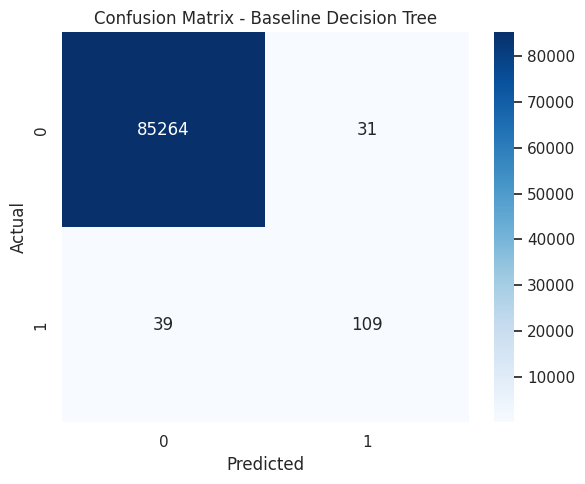


[4] Decision Tree with Undersampling...
Resampled Training Distribution: Counter({0: 34400, 1: 344})

DT with Undersampling Evaluation Metrics
Accuracy:  0.9971
Precision: 0.3569
Recall:    0.8176
F1 Score:  0.4969

Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9974    0.9986     85295
           1     0.3569    0.8176    0.4969       148

    accuracy                         0.9971     85443
   macro avg     0.6783    0.9075    0.7477     85443
weighted avg     0.9986    0.9971    0.9977     85443



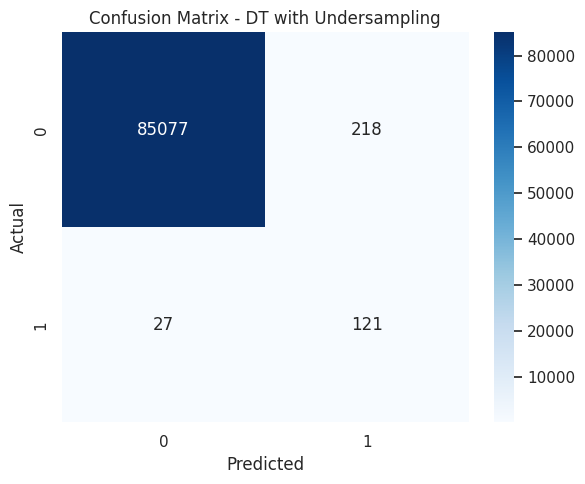


[5] Decision Tree with Class Weights...

DT with Class Weights Evaluation Metrics
Accuracy:  0.9991
Precision: 0.7734
Recall:    0.6689
F1 Score:  0.7174

Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9997    0.9995     85295
           1     0.7734    0.6689    0.7174       148

    accuracy                         0.9991     85443
   macro avg     0.8864    0.8343    0.8585     85443
weighted avg     0.9990    0.9991    0.9991     85443



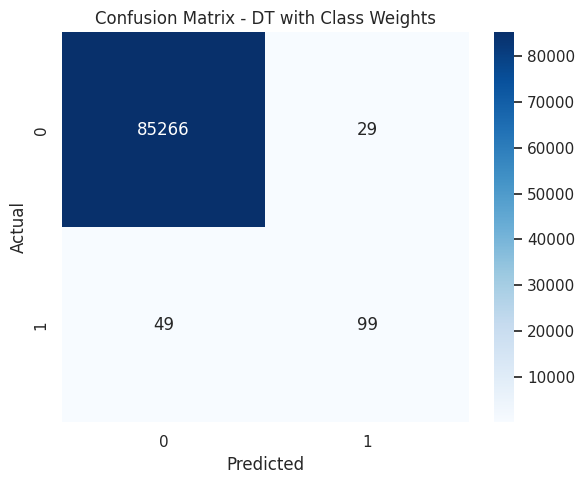


[6] Comparing All Approaches...


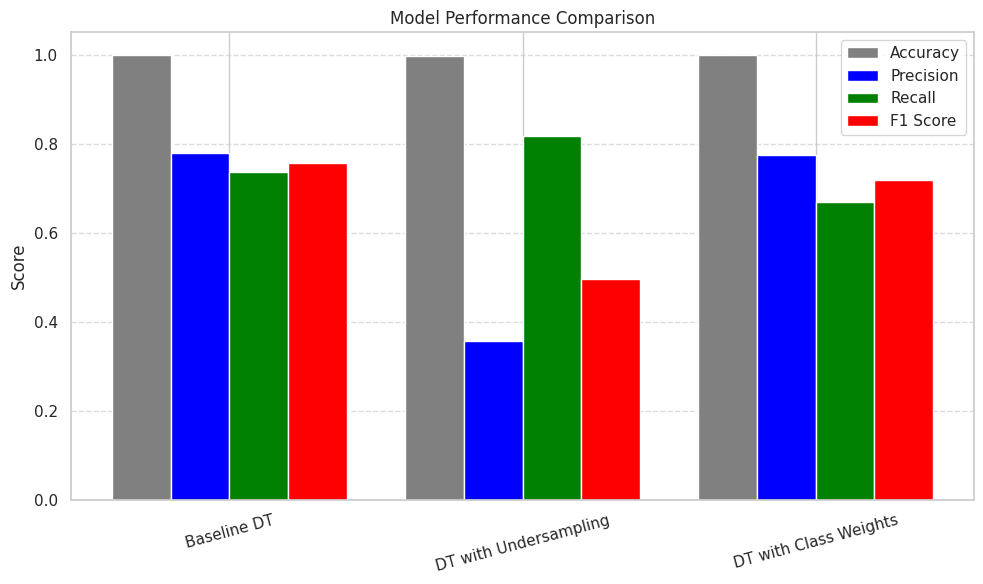


SUMMARY COMPARISON TABLE
Model                        Accuracy   Precision  Recall     F1 Score
-----------------------------------------------------------------
Baseline DT                  0.9992     0.7786     0.7365     0.7569
DT with Undersampling        0.9971     0.3569     0.8176     0.4969
DT with Class Weights        0.9991     0.7734     0.6689     0.7174


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Plotting styles
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

print("CREDIT CARD FRAUD DETECTION WITH DECISION TREES")
print("="*60)

# 1. Load Dataset & Exploratory Data Analysis (EDA)
print("\n[1] Loading the dataset...")
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nDataset Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

# Class Distribution
class_counts = df['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)
print(f"Fraud percentage: {class_counts[1]/len(df)*100:.4f}%")

# Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette=['blue', 'red'])
plt.title('Class Distribution: 0 = Normal, 1 = Fraud')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Amount Distribution by Class
plt.figure(figsize=(12, 5))
for i, label in enumerate([0, 1]):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[df['Class']==label]['Amount'], bins=50, kde=True, color='blue' if label==0 else 'red')
    plt.xscale('log')
    plt.title(f"Amount Distribution - {'Normal' if label==0 else 'Fraud'}")
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Time Distribution by Class
plt.figure(figsize=(12, 5))
for i, label in enumerate([0, 1]):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[df['Class']==label]['Time'], bins=50, kde=True, color='blue' if label==0 else 'red')
    plt.title(f"Time Distribution - {'Normal' if label==0 else 'Fraud'}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix')
plt.show()

# Top 10 Correlated Features
correlations = df.corr()['Class'].abs().sort_values(ascending=False)
top_features = correlations[1:11].index.tolist()

plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_features):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(df[df['Class'] == 0][feature], label='Normal', color='blue')
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', color='red')
    plt.title(f'{feature}')
    plt.legend()
plt.tight_layout()
plt.show()

print("\nTop 10 features most correlated with fraud:")
for feature in top_features:
    print(f"{feature}: {correlations[feature]:.4f}")

# 2. Data Preprocessing
print("\n[2] Preprocessing...")
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = RobustScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# 3. Model Evaluation Function
def evaluate_model(model, X, y, name="Model"):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f"\n{name} Evaluation Metrics")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y, y_pred, digits=4))

    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    return acc, prec, rec, f1

# 4. Baseline Decision Tree
print("\n[3] Baseline Decision Tree (No Resampling)...")
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_metrics = evaluate_model(baseline_model, X_test, y_test, "Baseline Decision Tree")

# 5. Decision Tree with Undersampling
print("\n[4] Decision Tree with Undersampling...")
rus = RandomUnderSampler(sampling_strategy=0.01, random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(f"Resampled Training Distribution: {Counter(y_train_rus)}")

rus_model = DecisionTreeClassifier(random_state=42)
rus_model.fit(X_train_rus, y_train_rus)
rus_metrics = evaluate_model(rus_model, X_test, y_test, "DT with Undersampling")

# 6. Decision Tree with Class Weights
print("\n[5] Decision Tree with Class Weights...")
weighted_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
weighted_model.fit(X_train, y_train)
weighted_metrics = evaluate_model(weighted_model, X_test, y_test, "DT with Class Weights")

# 7. Performance Comparison
print("\n[6] Comparing All Approaches...")

models = ["Baseline DT", "DT with Undersampling", "DT with Class Weights"]
accs = [baseline_metrics[0], rus_metrics[0], weighted_metrics[0]]
precs = [baseline_metrics[1], rus_metrics[1], weighted_metrics[1]]
recs = [baseline_metrics[2], rus_metrics[2], weighted_metrics[2]]
f1s = [baseline_metrics[3], rus_metrics[3], weighted_metrics[3]]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accs, width, label='Accuracy', color='gray')
plt.bar(x - 0.5*width, precs, width, label='Precision', color='blue')
plt.bar(x + 0.5*width, recs, width, label='Recall', color='green')
plt.bar(x + 1.5*width, f1s, width, label='F1 Score', color='red')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary Table
print("\nSUMMARY COMPARISON TABLE")
print("="*65)
print(f"{'Model':<28} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score'}")
print("-"*65)
for i in range(len(models)):
    print(f"{models[i]:<28} {accs[i]:.4f}     {precs[i]:.4f}     {recs[i]:.4f}     {f1s[i]:.4f}")
print("="*65)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CREDIT CARD FRAUD DETECTION WITH DECISION TREES

[1] Loading the dataset...
Dataset Shape: (284807, 31)

First 5 rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  .

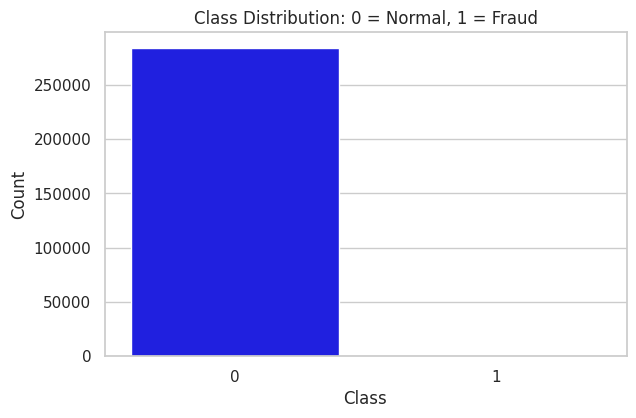

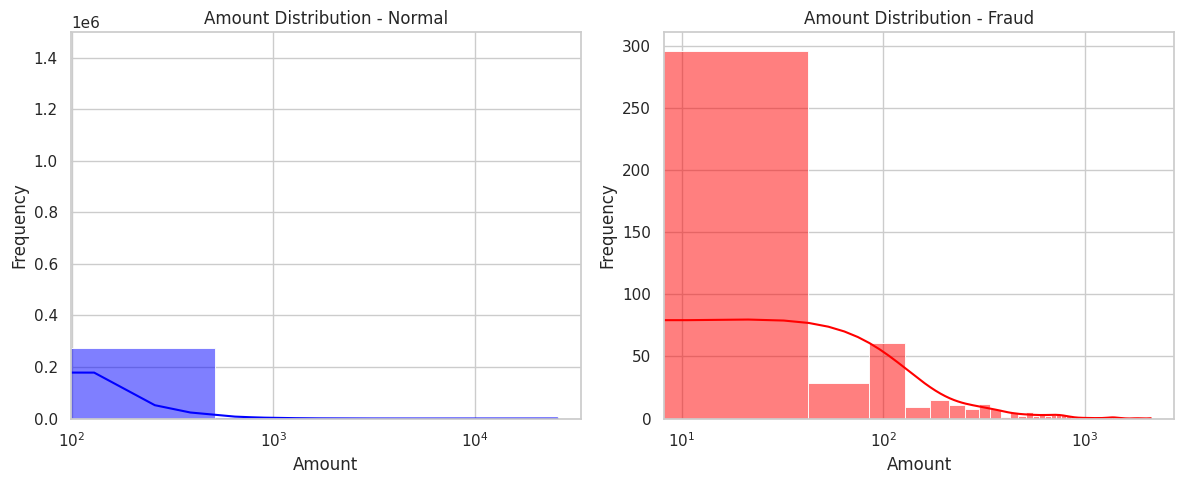

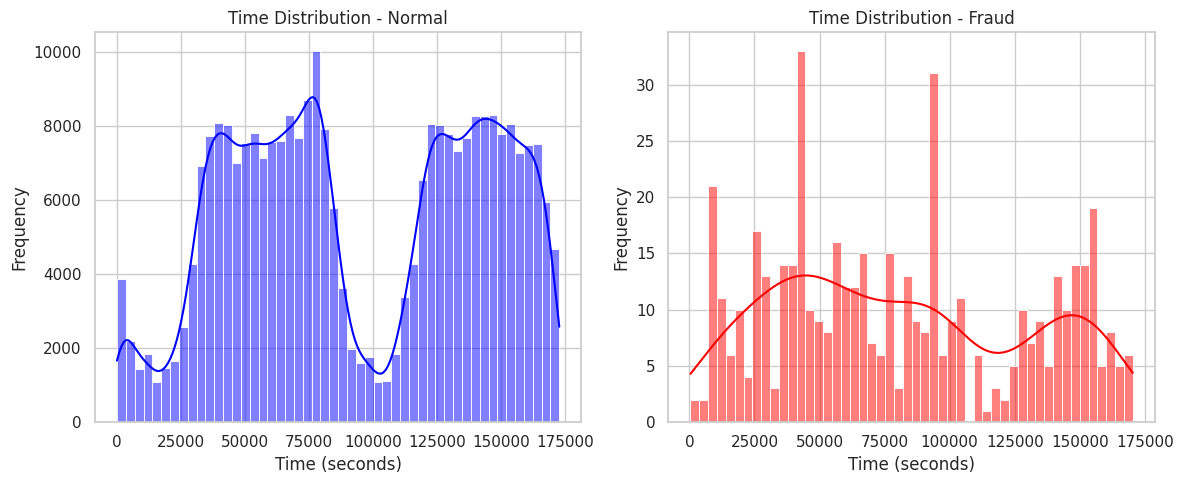

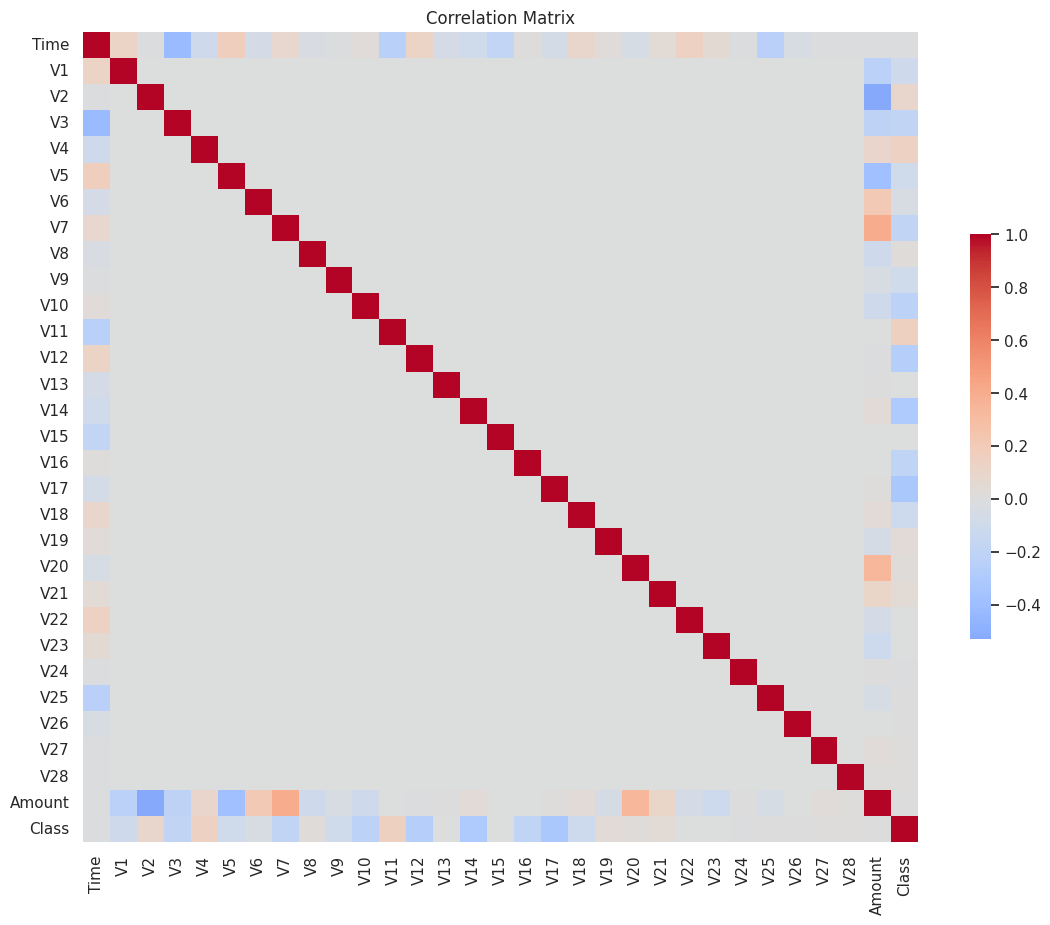

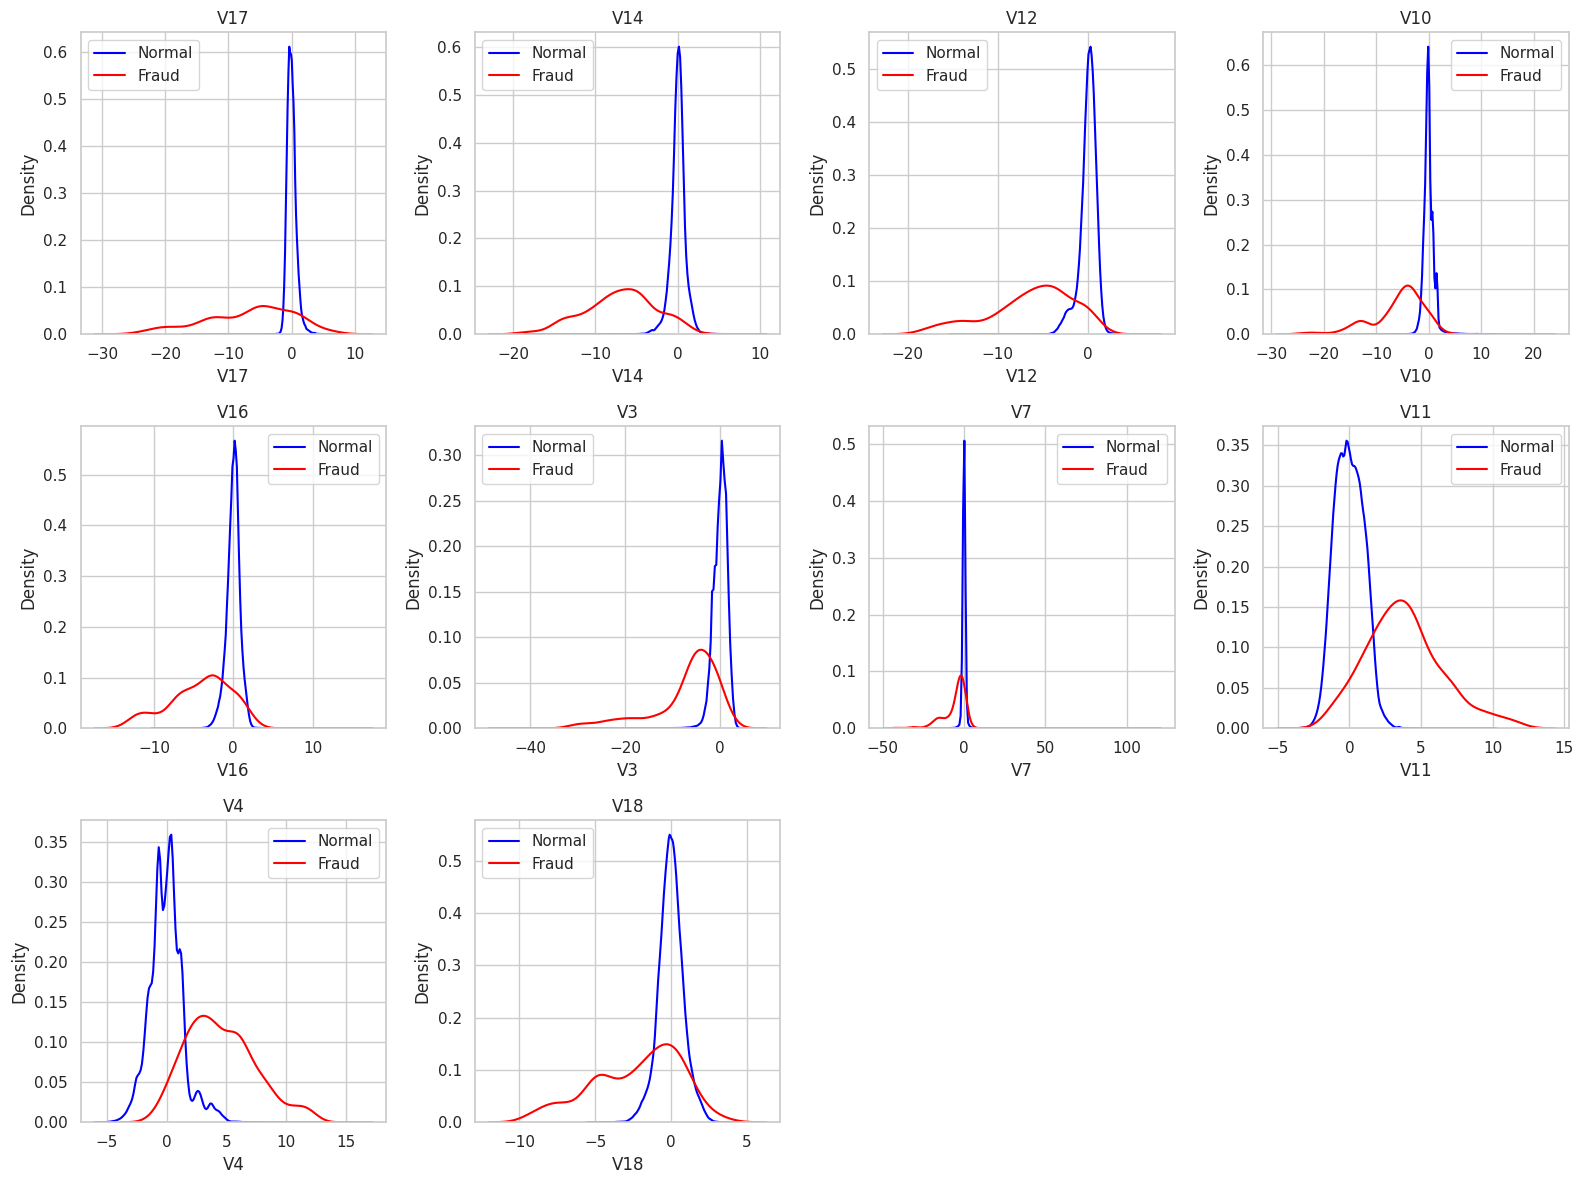


Top 10 features most correlated with fraud:
V17: 0.3265
V14: 0.3025
V12: 0.2606
V10: 0.2169
V16: 0.1965
V3: 0.1930
V7: 0.1873
V11: 0.1549
V4: 0.1334
V18: 0.1115

[2] Preprocessing...
Training set shape: (199364, 30), Testing set shape: (85443, 30)

[3] Baseline Decision Tree (No Resampling)...

Baseline Decision Tree Evaluation Metrics
Accuracy:  0.9992
Precision: 0.7786
Recall:    0.7365
F1 Score:  0.7569
ROC AUC:   0.8681

Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9996    0.9996     85295
           1     0.7786    0.7365    0.7569       148

    accuracy                         0.9992     85443
   macro avg     0.8891    0.8681    0.8783     85443
weighted avg     0.9992    0.9992    0.9992     85443



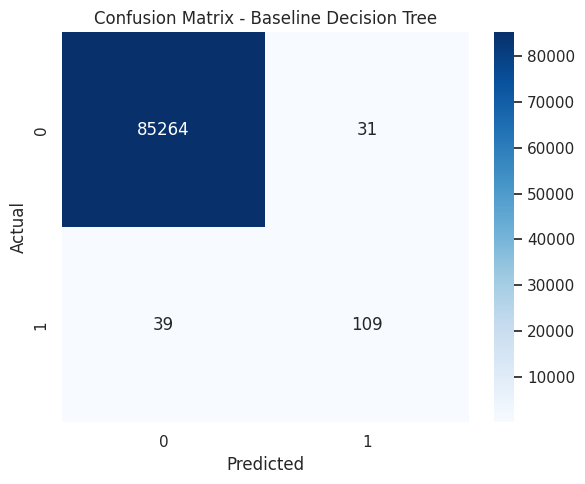

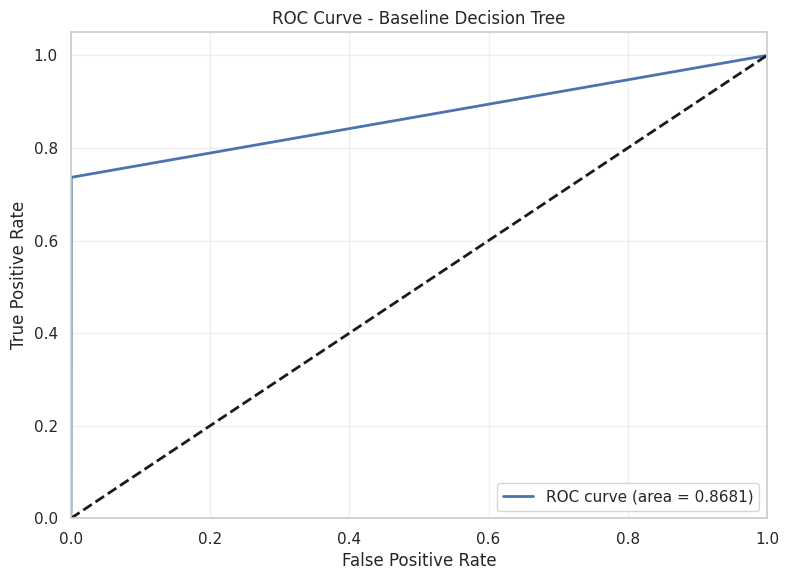


[4] Decision Tree with Undersampling...
Resampled Training Distribution: Counter({0: 3440, 1: 344})

DT with Undersampling Evaluation Metrics
Accuracy:  0.9844
Precision: 0.0850
Recall:    0.8176
F1 Score:  0.1539
ROC AUC:   0.9011

Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9847    0.9921     85295
           1     0.0850    0.8176    0.1539       148

    accuracy                         0.9844     85443
   macro avg     0.5423    0.9011    0.5730     85443
weighted avg     0.9981    0.9844    0.9907     85443



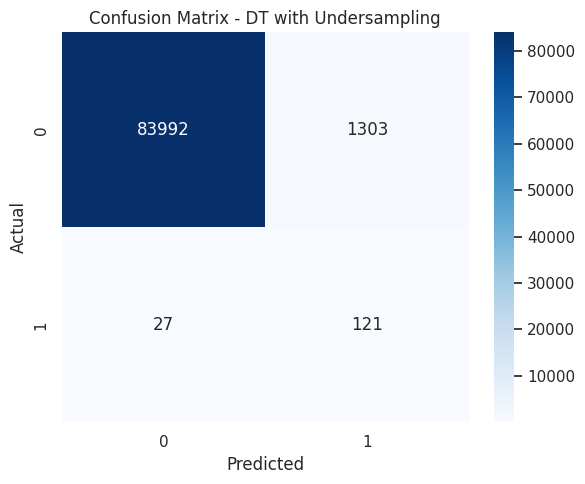

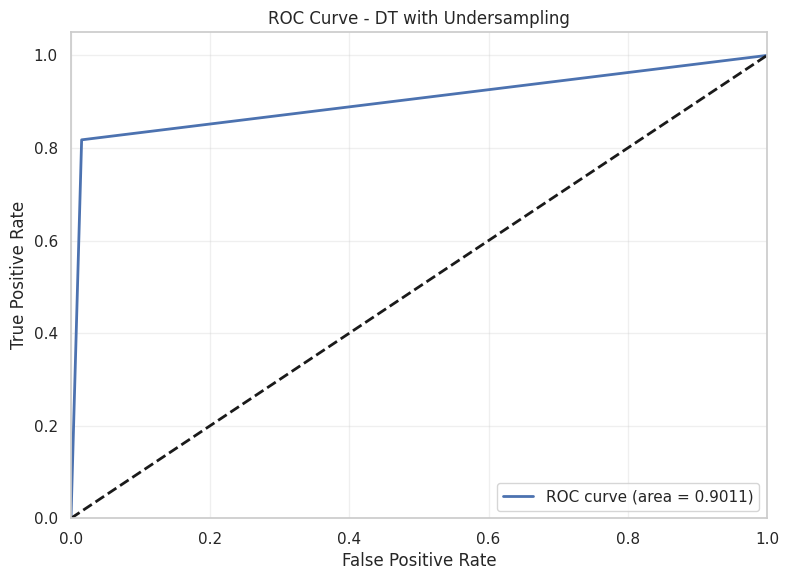


[5] Decision Tree with Class Weights...

DT with Class Weights Evaluation Metrics
Accuracy:  0.9993
Precision: 0.8333
Recall:    0.7095
F1 Score:  0.7664
ROC AUC:   0.8546

Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996     85295
           1     0.8333    0.7095    0.7664       148

    accuracy                         0.9993     85443
   macro avg     0.9164    0.8546    0.8830     85443
weighted avg     0.9992    0.9993    0.9992     85443



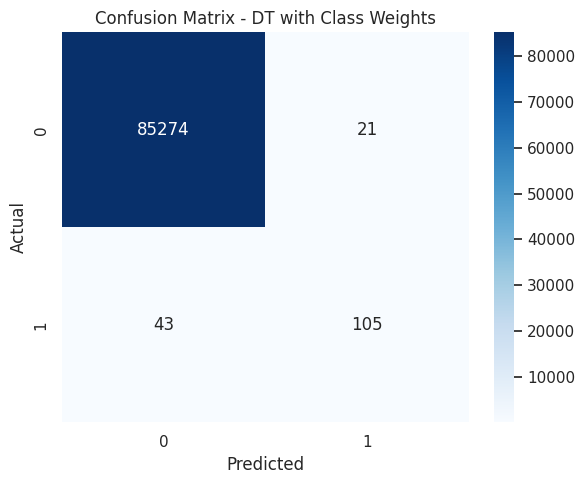

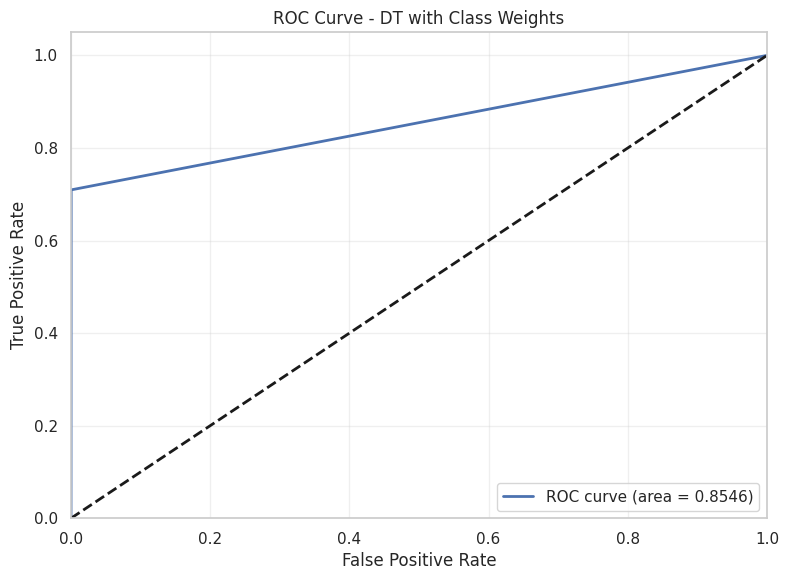


[6] Comparing All Approaches...


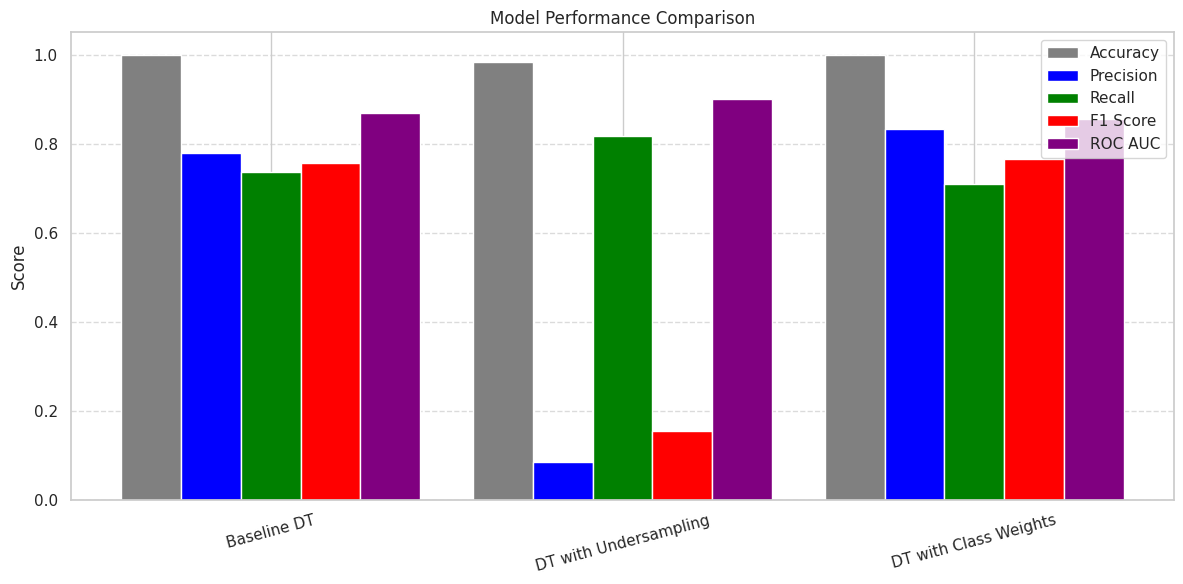

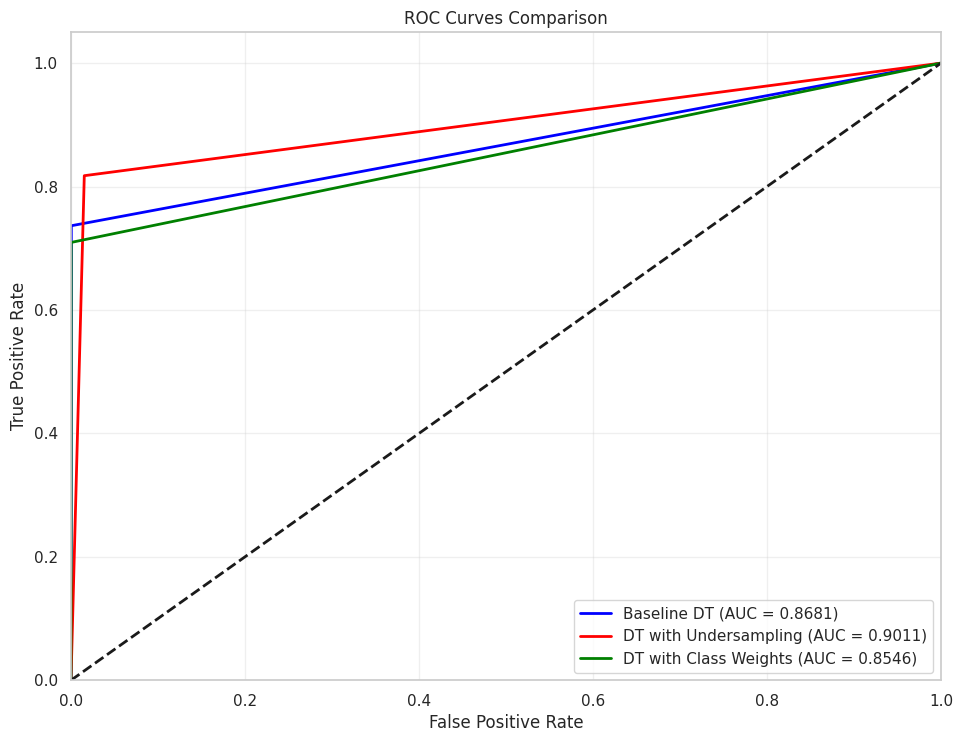

Number of rows: 284807
Number of columns: 31

SUMMARY COMPARISON TABLE
Model                        Accuracy  Precision Recall    F1 Score  ROC AUC
---------------------------------------------------------------------------
Baseline DT                  0.9992    0.7786    0.7365    0.7569    0.8681
DT with Undersampling        0.9844    0.0850    0.8176    0.1539    0.9011
DT with Class Weights        0.9993    0.8333    0.7095    0.7664    0.8546


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, roc_auc_score # Added ROC metrics
)
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

# Plotting styles
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

print("CREDIT CARD FRAUD DETECTION WITH DECISION TREES")
print("="*60)

# 1. Load Dataset & Exploratory Data Analysis (EDA)
print("\n[1] Loading the dataset...")
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nDataset Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

# Class Distribution
class_counts = df['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)
print(f"Fraud percentage: {class_counts[1]/len(df)*100:.4f}%")

# Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette=['blue', 'red'])
plt.title('Class Distribution: 0 = Normal, 1 = Fraud')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Amount Distribution by Class
plt.figure(figsize=(12, 5))
for i, label in enumerate([0, 1]):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[df['Class']==label]['Amount'], bins=50, kde=True, color='blue' if label==0 else 'red')
    plt.xscale('log')
    plt.title(f"Amount Distribution - {'Normal' if label==0 else 'Fraud'}")
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Time Distribution by Class
plt.figure(figsize=(12, 5))
for i, label in enumerate([0, 1]):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[df['Class']==label]['Time'], bins=50, kde=True, color='blue' if label==0 else 'red')
    plt.title(f"Time Distribution - {'Normal' if label==0 else 'Fraud'}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix')
plt.show()

# Top 10 Correlated Features
correlations = df.corr()['Class'].abs().sort_values(ascending=False)
top_features = correlations[1:11].index.tolist()

plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_features):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(df[df['Class'] == 0][feature], label='Normal', color='blue')
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', color='red')
    plt.title(f'{feature}')
    plt.legend()
plt.tight_layout()
plt.show()

print("\nTop 10 features most correlated with fraud:")
for feature in top_features:
    print(f"{feature}: {correlations[feature]:.4f}")

# 2. Data Preprocessing
print("\n[2] Preprocessing...")
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = RobustScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# 3. Model Evaluation Function with ROC AUC
def evaluate_model(model, X, y, name="Model"):
    y_pred = model.predict(X)
    y_scores = model.predict_proba(X)[:, 1]  # Get probability estimates for positive class

    # Calculate metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_scores)

    print(f"\n{name} Evaluation Metrics")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC AUC:   {roc_auc:.4f}")
    print("\nClassification Report:\n", classification_report(y, y_pred, digits=4))

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    return acc, prec, rec, f1, roc_auc

# 4. Baseline Decision Tree
print("\n[3] Baseline Decision Tree (No Resampling)...")
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_metrics = evaluate_model(baseline_model, X_test, y_test, "Baseline Decision Tree")

# 5. Decision Tree with Undersampling
print("\n[4] Decision Tree with Undersampling...")
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(f"Resampled Training Distribution: {Counter(y_train_rus)}")

rus_model = DecisionTreeClassifier(random_state=42)
rus_model.fit(X_train_rus, y_train_rus)
rus_metrics = evaluate_model(rus_model, X_test, y_test, "DT with Undersampling")

# 6. Decision Tree with Class Weights
print("\n[5] Decision Tree with Class Weights...")
weighted_model = DecisionTreeClassifier(class_weight={0: 1, 1: 20}, random_state=42)
weighted_model.fit(X_train, y_train)
weighted_metrics = evaluate_model(weighted_model, X_test, y_test, "DT with Class Weights")

# 7. Performance Comparison with ROC AUC
print("\n[6] Comparing All Approaches...")

models = ["Baseline DT", "DT with Undersampling", "DT with Class Weights"]
accs = [baseline_metrics[0], rus_metrics[0], weighted_metrics[0]]
precs = [baseline_metrics[1], rus_metrics[1], weighted_metrics[1]]
recs = [baseline_metrics[2], rus_metrics[2], weighted_metrics[2]]
f1s = [baseline_metrics[3], rus_metrics[3], weighted_metrics[3]]
aucs = [baseline_metrics[4], rus_metrics[4], weighted_metrics[4]]  # ROC AUC scores

# Plot metrics comparison
x = np.arange(len(models))
width = 0.17

plt.figure(figsize=(12, 6))
plt.bar(x - 2*width, accs, width, label='Accuracy', color='gray')
plt.bar(x - width, precs, width, label='Precision', color='blue')
plt.bar(x, recs, width, label='Recall', color='green')
plt.bar(x + width, f1s, width, label='F1 Score', color='red')
plt.bar(x + 2*width, aucs, width, label='ROC AUC', color='purple')  # Added ROC AUC bar
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot ROC curves for all models together
plt.figure(figsize=(10, 8))

# Get all ROC curves
models_list = [baseline_model, rus_model, weighted_model]
names = ["Baseline DT", "DT with Undersampling", "DT with Class Weights"]
colors = ['blue', 'red', 'green']

for model, name, color in zip(models_list, names, colors):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Summary Table with ROC AUC
print("\nSUMMARY COMPARISON TABLE")
print("="*75)
print(f"{'Model':<28} {'Accuracy':<9} {'Precision':<9} {'Recall':<9} {'F1 Score':<9} {'ROC AUC'}")
print("-"*75)
for i in range(len(models)):
    print(f"{models[i]:<28} {accs[i]:.4f}    {precs[i]:.4f}    {recs[i]:.4f}    {f1s[i]:.4f}    {aucs[i]:.4f}")
print("="*75)

Mounted at /content/drive
CREDIT CARD FRAUD DETECTION WITH DECISION TREES

[1] Loading the dataset...
Dataset Shape: (284807, 31)

First 5 rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 

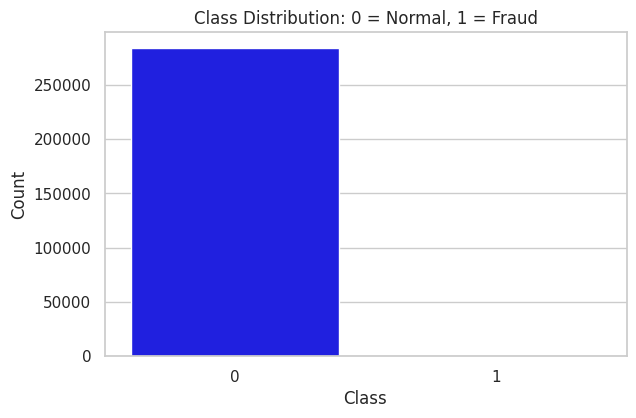

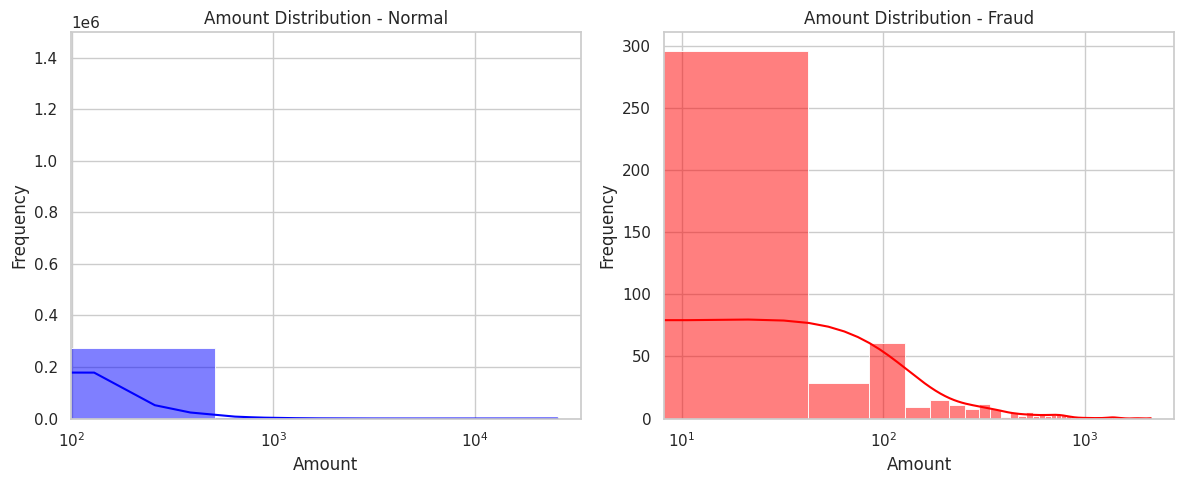

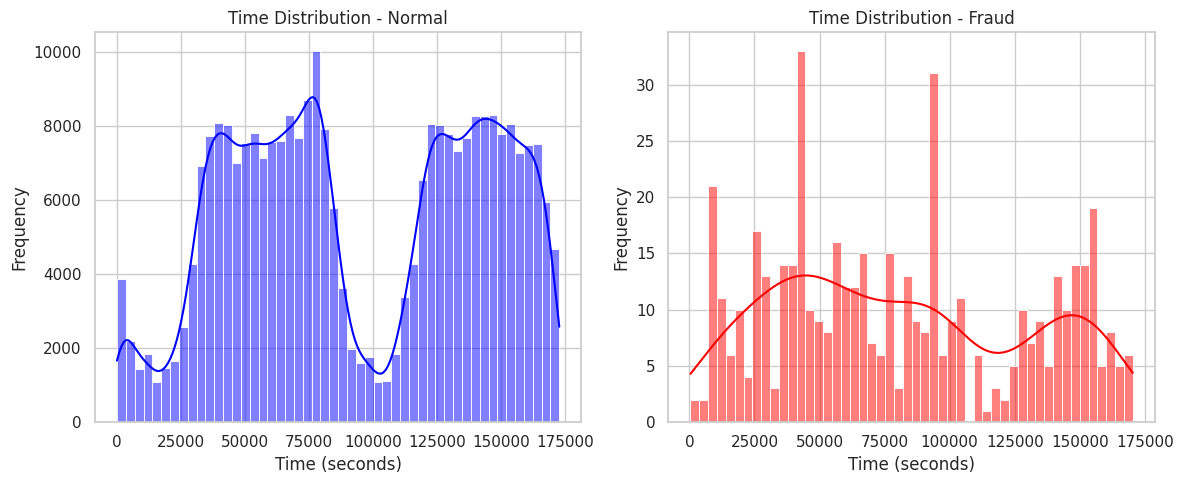

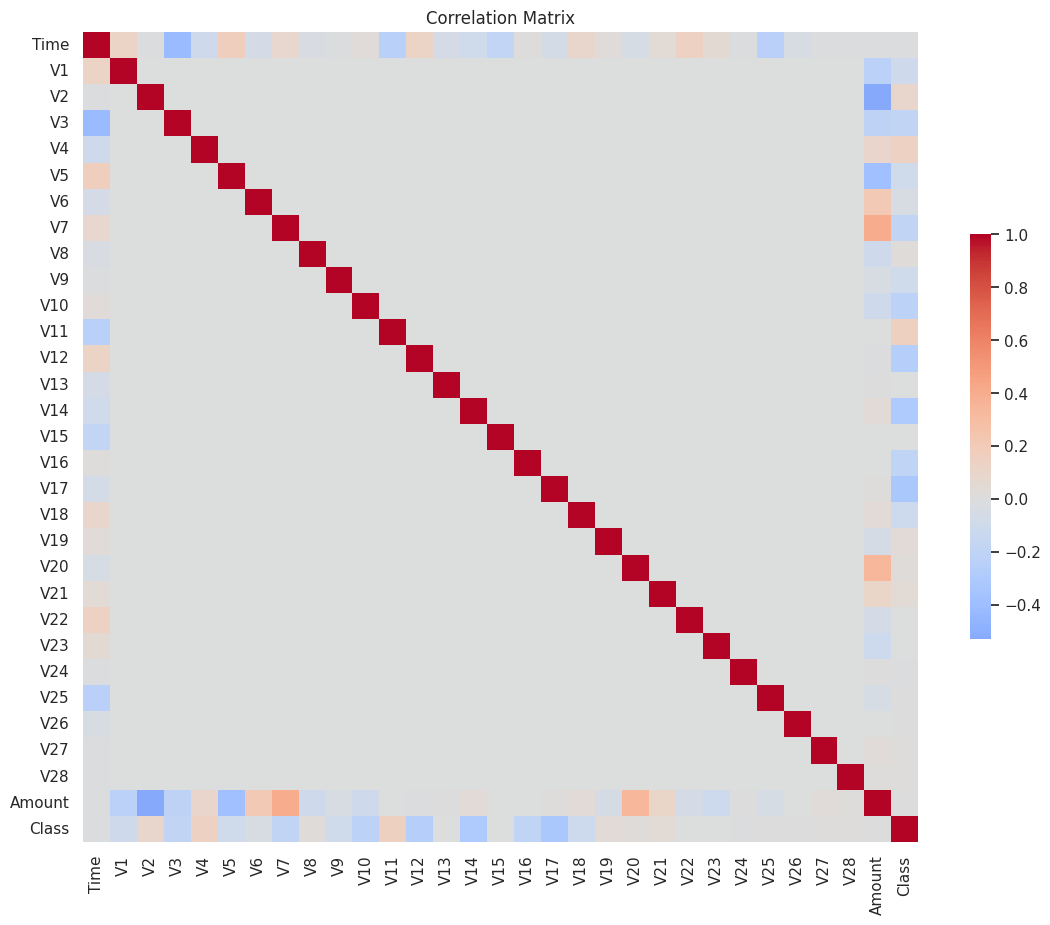

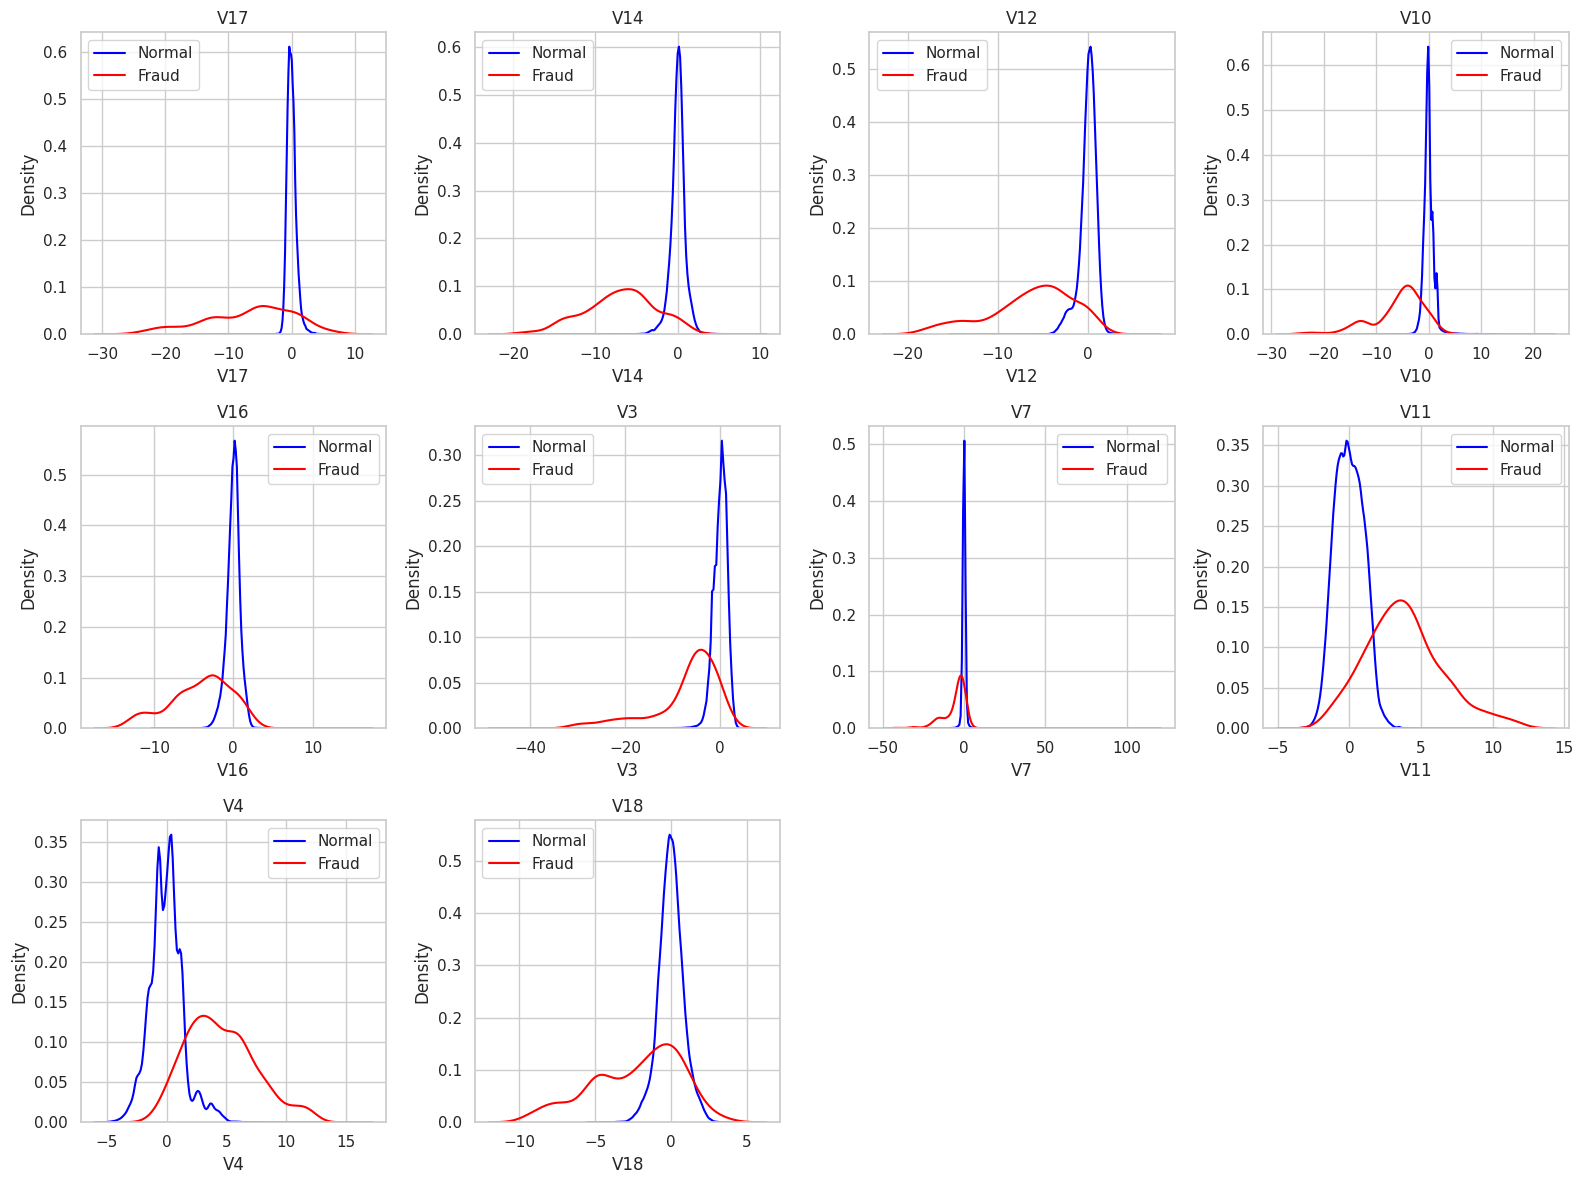


Top 10 features most correlated with fraud:
V17: 0.3265
V14: 0.3025
V12: 0.2606
V10: 0.2169
V16: 0.1965
V3: 0.1930
V7: 0.1873
V11: 0.1549
V4: 0.1334
V18: 0.1115

[2] Preprocessing...
Using a stratified sample of 50000 records for faster processing...
Sample size: 45492 records
Training set shape: (31844, 30), Testing set shape: (13648, 30)

[3] Baseline Decision Tree (No Resampling)...

Performing 3-fold cross-validation...
Cross-validation roc_auc scores: [0.92432505 0.88600414 0.91113784]
Mean roc_auc: 0.9072 (±0.0159)

Baseline Decision Tree Evaluation Metrics
Accuracy:  0.9955
Precision: 0.7806
Recall:    0.8176
F1 Score:  0.7987
ROC AUC:   0.9075

Classification Report:
               precision    recall  f1-score   support

           0     0.9980    0.9975    0.9977     13500
           1     0.7806    0.8176    0.7987       148

    accuracy                         0.9955     13648
   macro avg     0.8893    0.9075    0.8982     13648
weighted avg     0.9956    0.9955    0.995

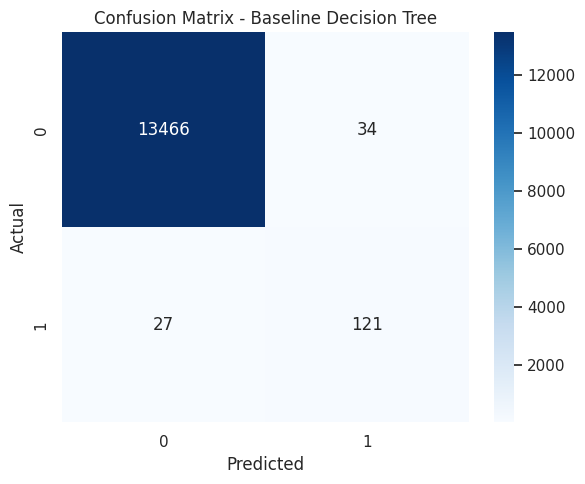

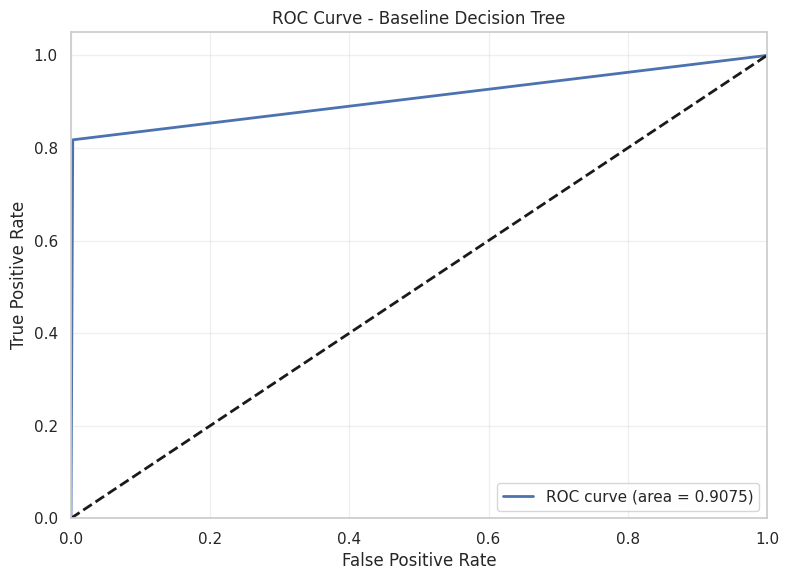


[4] Tuning Hyperparameters for Baseline Decision Tree...

Performing hyperparameter tuning with GridSearchCV...
Using subset of data for faster hyperparameter tuning...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best roc_auc score: 0.9231
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


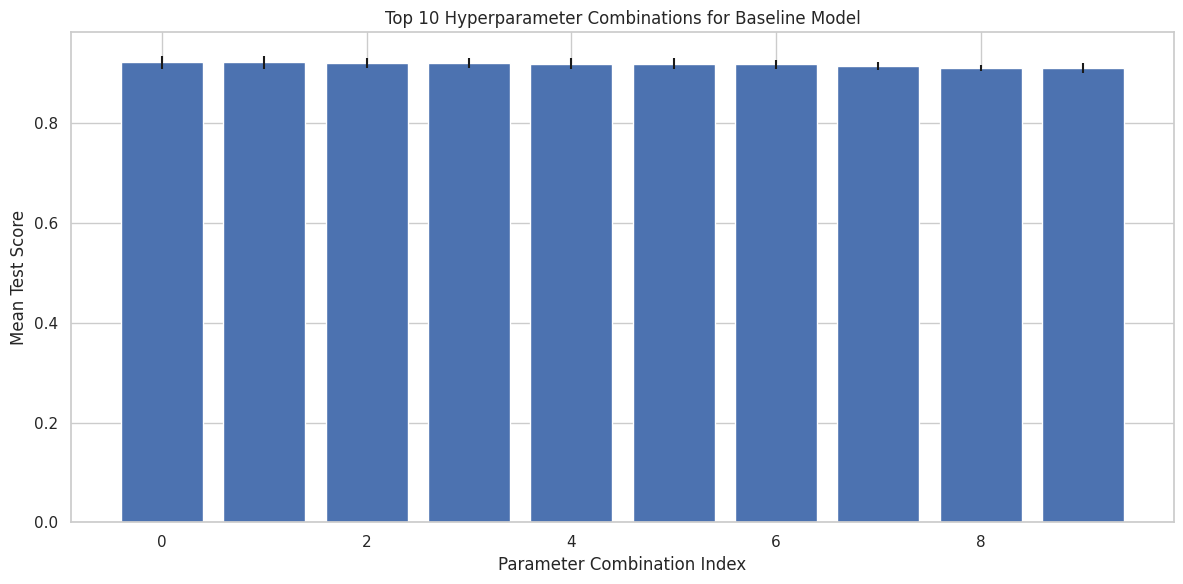


Tuned Baseline Decision Tree Evaluation Metrics
Accuracy:  0.9968
Precision: 0.8947
Recall:    0.8041
F1 Score:  0.8470
ROC AUC:   0.9280

Classification Report:
               precision    recall  f1-score   support

           0     0.9979    0.9990    0.9984     13500
           1     0.8947    0.8041    0.8470       148

    accuracy                         0.9968     13648
   macro avg     0.9463    0.9015    0.9227     13648
weighted avg     0.9967    0.9968    0.9968     13648



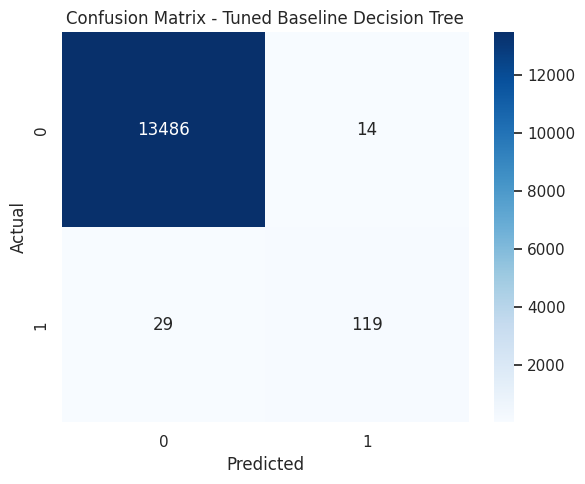

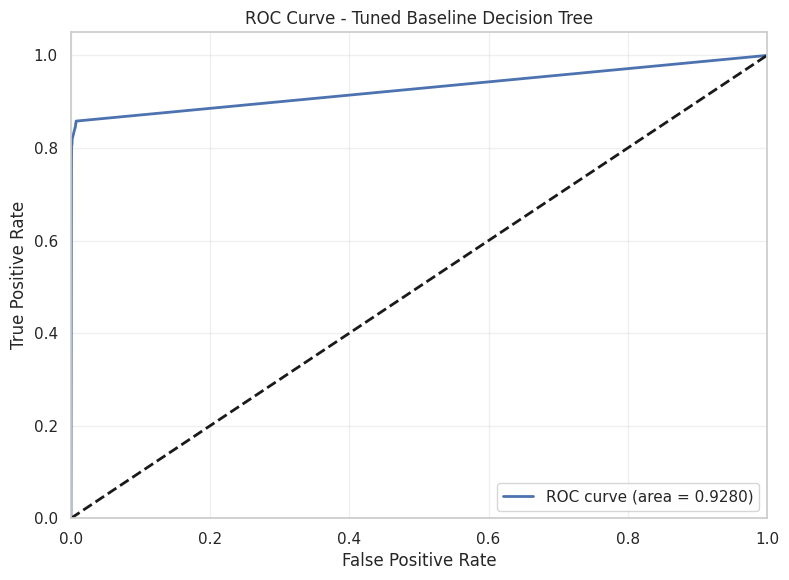


[5] Decision Tree with Undersampling and Cross-Validation...
Resampled Training Distribution: Counter({0: 1720, 1: 344})

Performing 3-fold cross-validation...
Cross-validation roc_auc scores: [0.94917171 0.91125275 0.94167236]
Mean roc_auc: 0.9340 (±0.0164)

DT with Undersampling Evaluation Metrics
Accuracy:  0.9695
Precision: 0.2433
Recall:    0.8581
F1 Score:  0.3791
ROC AUC:   0.9144

Classification Report:
               precision    recall  f1-score   support

           0     0.9984    0.9707    0.9844     13500
           1     0.2433    0.8581    0.3791       148

    accuracy                         0.9695     13648
   macro avg     0.6208    0.9144    0.6817     13648
weighted avg     0.9902    0.9695    0.9778     13648



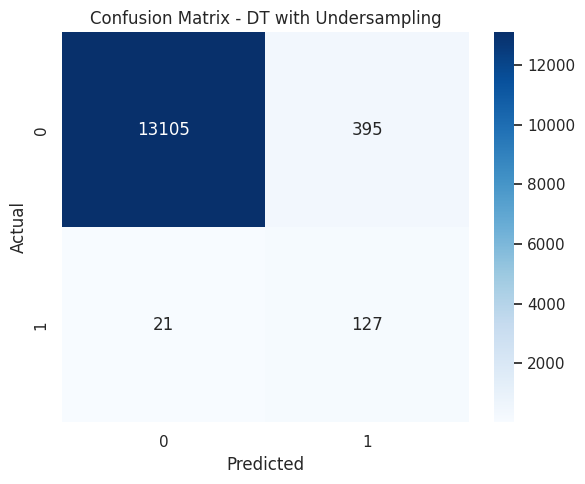

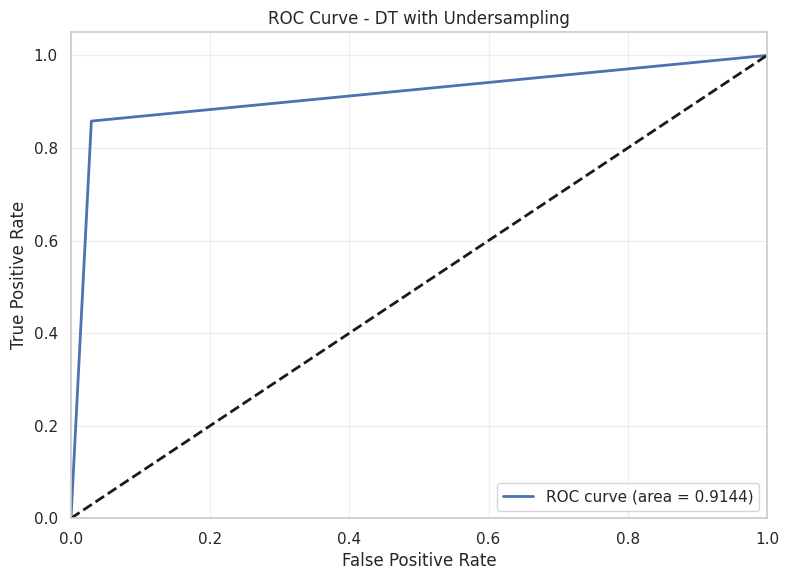


[6] Tuning Hyperparameters for Decision Tree with Undersampling...

Performing hyperparameter tuning with GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best roc_auc score: 0.9546
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

Tuned DT with Undersampling Evaluation Metrics
Accuracy:  0.9905
Precision: 0.5404
Recall:    0.8581
F1 Score:  0.6632
ROC AUC:   0.9362

Classification Report:
               precision    recall  f1-score   support

           0     0.9984    0.9920    0.9952     13500
           1     0.5404    0.8581    0.6632       148

    accuracy                         0.9905     13648
   macro avg     0.7694    0.9251    0.8292     13648
weighted avg     0.9935    0.9905    0.9916     13648



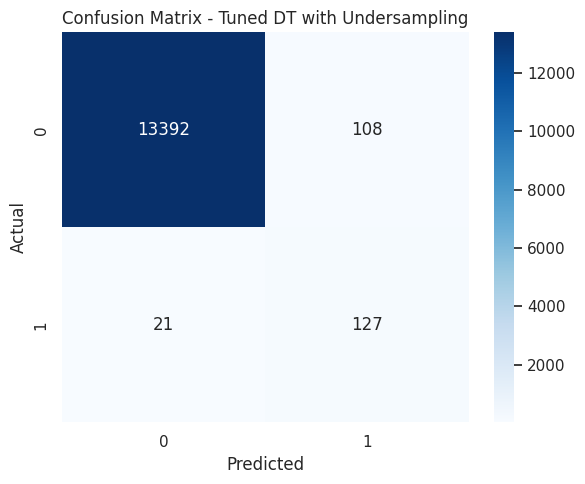

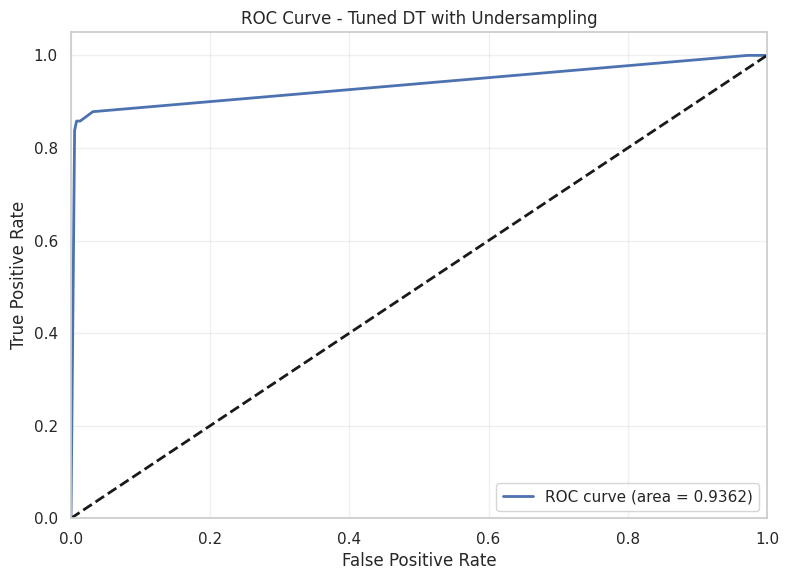


[7] Decision Tree with Class Weights and Cross-Validation...

Performing 3-fold cross-validation...
Cross-validation roc_auc scores: [0.90721946 0.87735611 0.89793233]
Mean roc_auc: 0.8942 (±0.0125)

DT with Class Weights Evaluation Metrics
Accuracy:  0.9958
Precision: 0.8054
Recall:    0.8108
F1 Score:  0.8081
ROC AUC:   0.9043

Classification Report:
               precision    recall  f1-score   support

           0     0.9979    0.9979    0.9979     13500
           1     0.8054    0.8108    0.8081       148

    accuracy                         0.9958     13648
   macro avg     0.9016    0.9043    0.9030     13648
weighted avg     0.9958    0.9958    0.9958     13648



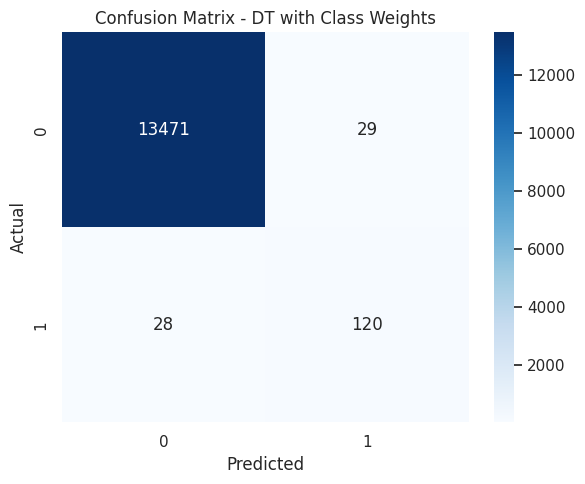

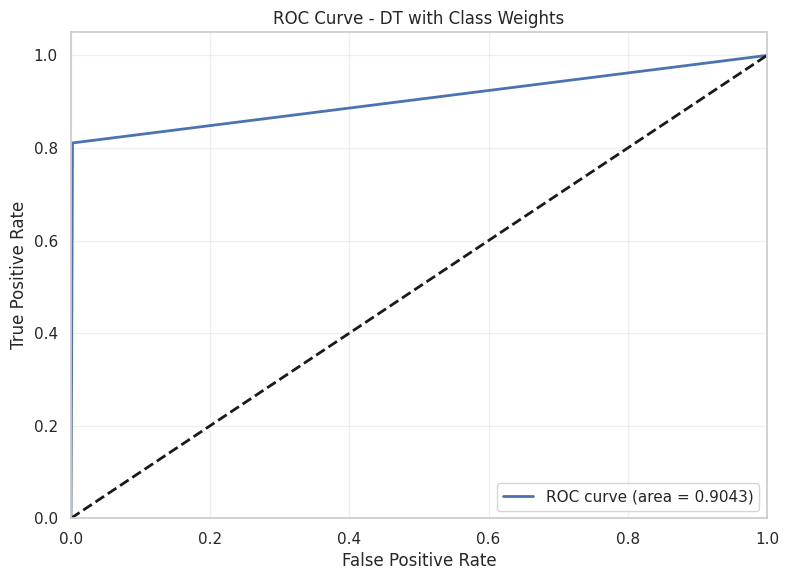


[8] Tuning Hyperparameters for Decision Tree with Class Weights...

Performing hyperparameter tuning with GridSearchCV...
Using subset of data for faster hyperparameter tuning...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best roc_auc score: 0.9281
Best parameters: {'class_weight': {0: 1, 1: 20}, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}

Tuned DT with Class Weights Evaluation Metrics
Accuracy:  0.9938
Precision: 0.6739
Recall:    0.8378
F1 Score:  0.7470
ROC AUC:   0.9349

Classification Report:
               precision    recall  f1-score   support

           0     0.9982    0.9956    0.9969     13500
           1     0.6739    0.8378    0.7470       148

    accuracy                         0.9938     13648
   macro avg     0.8361    0.9167    0.8719     13648
weighted avg     0.9947    0.9938    0.9942     13648



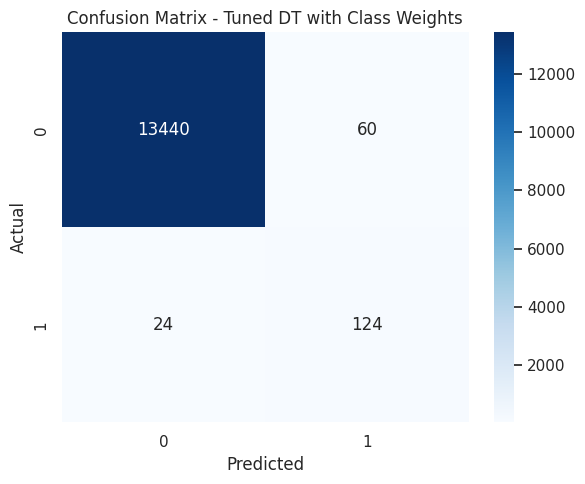

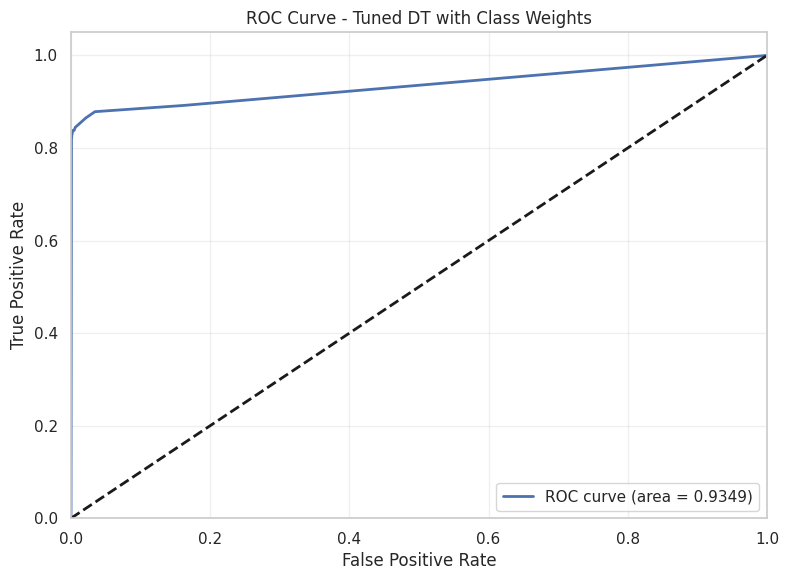


[9] Comparing All Approaches...


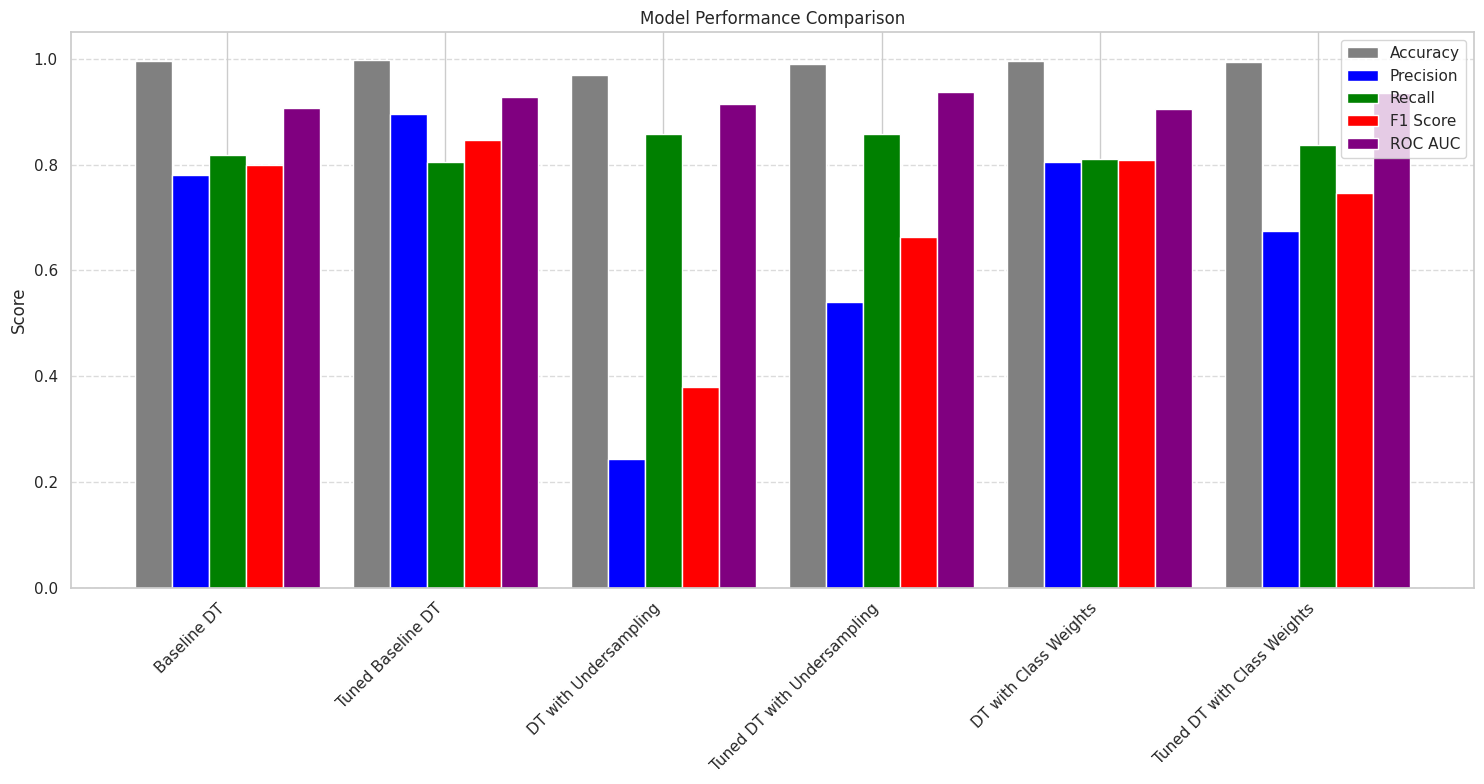

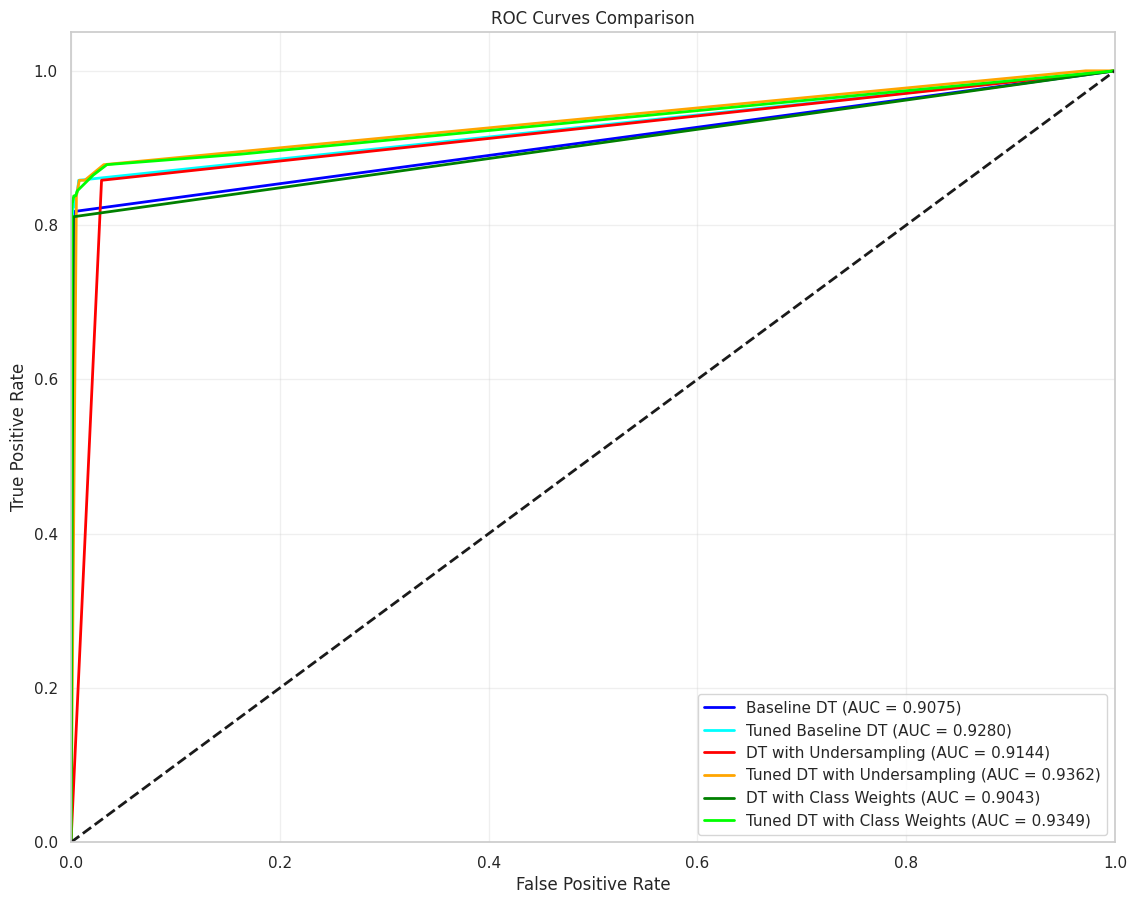

Number of rows: 284807
Number of columns: 31

SUMMARY COMPARISON TABLE
Model                          Accuracy  Precision Recall    F1 Score  ROC AUC
------------------------------------------------------------------------------------------
Baseline DT                    0.9955    0.7806    0.8176    0.7987    0.9075
Tuned Baseline DT              0.9968    0.8947    0.8041    0.8470    0.9280
DT with Undersampling          0.9695    0.2433    0.8581    0.3791    0.9144
Tuned DT with Undersampling    0.9905    0.5404    0.8581    0.6632    0.9362
DT with Class Weights          0.9958    0.8054    0.8108    0.8081    0.9043
Tuned DT with Class Weights    0.9938    0.6739    0.8378    0.7470    0.9349

Best performing model: Tuned DT with Undersampling
Parameters of best model:
  ccp_alpha: 0.0
  class_weight: None
  criterion: gini
  max_depth: 5
  max_features: None
  max_leaf_nodes: None
  min_impurity_decrease: 0.0
  min_samples_leaf: 1
  min_samples_split: 10
  min_weight_fraction_l

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, roc_auc_score
)
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

# Plotting styles
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

print("CREDIT CARD FRAUD DETECTION WITH DECISION TREES")
print("="*60)

# 1. Load Dataset & Exploratory Data Analysis (EDA)
print("\n[1] Loading the dataset...")
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nDataset Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

# Class Distribution
class_counts = df['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)
print(f"Fraud percentage: {class_counts[1]/len(df)*100:.4f}%")

# Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette=['blue', 'red'])
plt.title('Class Distribution: 0 = Normal, 1 = Fraud')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Amount Distribution by Class
plt.figure(figsize=(12, 5))
for i, label in enumerate([0, 1]):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[df['Class']==label]['Amount'], bins=50, kde=True, color='blue' if label==0 else 'red')
    plt.xscale('log')
    plt.title(f"Amount Distribution - {'Normal' if label==0 else 'Fraud'}")
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Time Distribution by Class
plt.figure(figsize=(12, 5))
for i, label in enumerate([0, 1]):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[df['Class']==label]['Time'], bins=50, kde=True, color='blue' if label==0 else 'red')
    plt.title(f"Time Distribution - {'Normal' if label==0 else 'Fraud'}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix')
plt.show()

# Top 10 Correlated Features
correlations = df.corr()['Class'].abs().sort_values(ascending=False)
top_features = correlations[1:11].index.tolist()

plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_features):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(df[df['Class'] == 0][feature], label='Normal', color='blue')
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', color='red')
    plt.title(f'{feature}')
    plt.legend()
plt.tight_layout()
plt.show()

print("\nTop 10 features most correlated with fraud:")
for feature in top_features:
    print(f"{feature}: {correlations[feature]:.4f}")

# 2. Data Preprocessing (with optional sampling for speed)
print("\n[2] Preprocessing...")
# Option to use a smaller sample of the data for faster processing
use_sample = True  # Set to False to use the full dataset
sample_size = 50000  # Maximum number of samples to use

if use_sample and len(df) > sample_size:
    print(f"Using a stratified sample of {sample_size} records for faster processing...")
    # Stratified sampling to maintain fraud/non-fraud ratio
    df_sample = pd.concat([
        df[df['Class'] == 1].sample(min(int(sample_size * 0.1), len(df[df['Class'] == 1])), random_state=42),
        df[df['Class'] == 0].sample(min(int(sample_size * 0.9), len(df[df['Class'] == 0])), random_state=42)
    ])
    print(f"Sample size: {len(df_sample)} records")
    X = df_sample.drop('Class', axis=1)
    y = df_sample['Class']
else:
    X = df.drop('Class', axis=1)
    y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = RobustScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# 3. Cross-Validation Function (with reduced folds)
def perform_cross_validation(model, X, y, cv=3, scoring='roc_auc'):  # Reduced from 5 to 3 folds
    print(f"\nPerforming {cv}-fold cross-validation...")

    # Define cross-validation strategy (stratified to maintain class balance)
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=skf, scoring=scoring)

    print(f"Cross-validation {scoring} scores: {cv_scores}")
    print(f"Mean {scoring}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    return cv_scores

# 4. Model Evaluation Function with ROC AUC
def evaluate_model(model, X, y, name="Model"):
    y_pred = model.predict(X)
    y_scores = model.predict_proba(X)[:, 1]  # Get probability estimates for positive class

    # Calculate metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_scores)

    print(f"\n{name} Evaluation Metrics")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC AUC:   {roc_auc:.4f}")
    print("\nClassification Report:\n", classification_report(y, y_pred, digits=4))

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    return acc, prec, rec, f1, roc_auc

# 5. Hyperparameter Tuning with GridSearchCV (with reduced folds and subset of data)
def tune_hyperparameters(X, y, param_grid, cv=3, model_class=DecisionTreeClassifier, scoring='roc_auc'):  # Reduced from 5 to 3 folds
    print(f"\nPerforming hyperparameter tuning with GridSearchCV...")

    # Use only a subset of data for hyperparameter tuning if dataset is large
    if len(X) > 20000:  # If dataset has more than 20k samples
        print("Using subset of data for faster hyperparameter tuning...")
        # Stratified sampling to maintain class distribution
        subset_indices = np.random.choice(
            np.arange(len(X)),
            size=min(20000, len(X)),
            replace=False
        )
        X_subset = X.iloc[subset_indices] if hasattr(X, 'iloc') else X[subset_indices]
        y_subset = y.iloc[subset_indices] if hasattr(y, 'iloc') else y[subset_indices]
    else:
        X_subset, y_subset = X, y

    # Initialize base model
    base_model = model_class(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42),
        scoring=scoring,
        n_jobs=-1,  # Use all processors
        verbose=1
    )

    # Fit GridSearchCV
    grid_search.fit(X_subset, y_subset)

    # Print results
    print(f"\nBest {scoring} score: {grid_search.best_score_:.4f}")
    print(f"Best parameters: {grid_search.best_params_}")

    # Get best model
    best_params = grid_search.best_params_

    # Train the final model with the best parameters on the full dataset
    final_model = model_class(random_state=42, **best_params)
    final_model.fit(X, y)

    # Create a DataFrame of CV results for visualization
    cv_results = pd.DataFrame(grid_search.cv_results_)

    return final_model, cv_results

# 6. Baseline Decision Tree with Cross-Validation
print("\n[3] Baseline Decision Tree (No Resampling)...")
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_cv_scores = perform_cross_validation(baseline_model, X_train, y_train)
baseline_model.fit(X_train, y_train)
baseline_metrics = evaluate_model(baseline_model, X_test, y_test, "Baseline Decision Tree")

# 7. Hyperparameter Tuning for Baseline Model (with reduced parameter grid)
print("\n[4] Tuning Hyperparameters for Baseline Decision Tree...")
param_grid_baseline = {
    'max_depth': [5, 15, None],  # Reduced values
    'min_samples_split': [2, 10],  # Reduced values
    'min_samples_leaf': [1, 4],  # Reduced values
    'criterion': ['gini']  # Only using gini criterion
}

tuned_baseline_model, baseline_cv_results = tune_hyperparameters(
    X_train, y_train, param_grid_baseline
)

# Visualize top hyperparameter combinations
top_results = baseline_cv_results.sort_values('mean_test_score', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_results)), top_results['mean_test_score'], yerr=top_results['std_test_score'])
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score')
plt.title('Top 10 Hyperparameter Combinations for Baseline Model')
plt.tight_layout()
plt.show()

# Evaluate tuned baseline model
tuned_baseline_metrics = evaluate_model(tuned_baseline_model, X_test, y_test, "Tuned Baseline Decision Tree")

# 8. Decision Tree with Undersampling and Cross-Validation (with increased sampling ratio for speed)
print("\n[5] Decision Tree with Undersampling and Cross-Validation...")
rus = RandomUnderSampler(sampling_strategy=0.2, random_state=42)  # Increased from 0.1 to 0.2 to reduce dataset size
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(f"Resampled Training Distribution: {Counter(y_train_rus)}")

rus_model = DecisionTreeClassifier(random_state=42)
rus_cv_scores = perform_cross_validation(rus_model, X_train_rus, y_train_rus)
rus_model.fit(X_train_rus, y_train_rus)
rus_metrics = evaluate_model(rus_model, X_test, y_test, "DT with Undersampling")

# 9. Hyperparameter Tuning for Undersampled Model (with reduced parameter grid)
print("\n[6] Tuning Hyperparameters for Decision Tree with Undersampling...")
param_grid_rus = {
    'max_depth': [5, 15, None],  # Reduced values
    'min_samples_split': [2, 10],  # Reduced values
    'min_samples_leaf': [1, 4],  # Reduced values
    'criterion': ['gini']  # Only using gini criterion
}

tuned_rus_model, rus_cv_results = tune_hyperparameters(
    X_train_rus, y_train_rus, param_grid_rus
)

# Evaluate tuned undersampled model
tuned_rus_metrics = evaluate_model(tuned_rus_model, X_test, y_test, "Tuned DT with Undersampling")

# 10. Decision Tree with Class Weights and Cross-Validation
print("\n[7] Decision Tree with Class Weights and Cross-Validation...")
weighted_model = DecisionTreeClassifier(class_weight={0: 1, 1: 20}, random_state=42)
weighted_cv_scores = perform_cross_validation(weighted_model, X_train, y_train)
weighted_model.fit(X_train, y_train)
weighted_metrics = evaluate_model(weighted_model, X_test, y_test, "DT with Class Weights")

# 11. Hyperparameter Tuning for Weighted Model (with reduced parameter grid)
print("\n[8] Tuning Hyperparameters for Decision Tree with Class Weights...")
param_grid_weighted = {
    'max_depth': [5, 15, None],  # Reduced values
    'min_samples_split': [2, 10],  # Reduced values
    'min_samples_leaf': [1, 4],  # Reduced values
    'class_weight': [{0: 1, 1: 20}, {0: 1, 1: 100}],  # Only two weight options
    'criterion': ['gini']  # Only using gini criterion
}

tuned_weighted_model, weighted_cv_results = tune_hyperparameters(
    X_train, y_train, param_grid_weighted
)

# Evaluate tuned weighted model
tuned_weighted_metrics = evaluate_model(tuned_weighted_model, X_test, y_test, "Tuned DT with Class Weights")

# 12. Performance Comparison with ROC AUC
print("\n[9] Comparing All Approaches...")

models = [
    "Baseline DT",
    "Tuned Baseline DT",
    "DT with Undersampling",
    "Tuned DT with Undersampling",
    "DT with Class Weights",
    "Tuned DT with Class Weights"
]

all_metrics = [
    baseline_metrics,
    tuned_baseline_metrics,
    rus_metrics,
    tuned_rus_metrics,
    weighted_metrics,
    tuned_weighted_metrics
]

accs = [metrics[0] for metrics in all_metrics]
precs = [metrics[1] for metrics in all_metrics]
recs = [metrics[2] for metrics in all_metrics]
f1s = [metrics[3] for metrics in all_metrics]
aucs = [metrics[4] for metrics in all_metrics]

# Plot metrics comparison
x = np.arange(len(models))
width = 0.17

plt.figure(figsize=(15, 8))
plt.bar(x - 2*width, accs, width, label='Accuracy', color='gray')
plt.bar(x - width, precs, width, label='Precision', color='blue')
plt.bar(x, recs, width, label='Recall', color='green')
plt.bar(x + width, f1s, width, label='F1 Score', color='red')
plt.bar(x + 2*width, aucs, width, label='ROC AUC', color='purple')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot ROC curves for all models together
plt.figure(figsize=(12, 10))

# Get all ROC curves
models_list = [
    baseline_model,
    tuned_baseline_model,
    rus_model,
    tuned_rus_model,
    weighted_model,
    tuned_weighted_model
]
names = models
colors = ['blue', 'cyan', 'red', 'orange', 'green', 'lime']

for model, name, color in zip(models_list, names, colors):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Summary Table with ROC AUC
print("\nSUMMARY COMPARISON TABLE")
print("="*90)
print(f"{'Model':<30} {'Accuracy':<9} {'Precision':<9} {'Recall':<9} {'F1 Score':<9} {'ROC AUC'}")
print("-"*90)
for i in range(len(models)):
    print(f"{models[i]:<30} {accs[i]:.4f}    {precs[i]:.4f}    {recs[i]:.4f}    {f1s[i]:.4f}    {aucs[i]:.4f}")
print("="*90)

# Feature importance visualization for best model
# Find the best model based on ROC AUC
best_model_index = np.argmax(aucs)
best_model = models_list[best_model_index]
best_model_name = models[best_model_index]

# Get feature importance
feature_importance = best_model.feature_importances_
feature_names = X_train.columns


print(f"\nBest performing model: {best_model_name}")
if hasattr(best_model, 'get_params'):
    print("Parameters of best model:")
    for param, value in best_model.get_params().items():
        print(f"  {param}: {value}")